In [1]:
!git clone https://github.com/eliazonta/AI-Challenge-HIT
import sys
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks")

Cloning into 'AI-Challenge-HIT'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 313 (delta 14), reused 22 (delta 8), pack-reused 269
Receiving objects: 100% (313/313), 3.08 MiB | 2.92 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [2]:
# load libraries
import pandas as pd
import os
import numpy as np
import datetime
from torch.utils.data import Dataset, DataLoader
from torch import save

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self, df_train, df_test, transform = None, target_transform = None):
    self.features = torch.FloatTensor(df_train.drop(['sensor_code','in_datetime'],axis=1).values)
    ### standardize the data
    ########################## TO DO: THE STANDARDIZATION MUST INCLUDE THE TARGET!!! 
    means = self.features.mean(dim=1, keepdim=True)
    stds = torch.clamp(self.features.std(dim=1, keepdim=True),min=1)
    #self.features = (self.features - means) / stds
    self.target = torch.FloatTensor(df_test.drop(['sensor_code','in_datetime']+[f"val_{idx}" for idx in range(n_previsions)],axis=1).values)
    #self.target = (self.target - means) / stds
    
    self.sensor_code = df_train['sensor_code'].values
    self.in_datetime = df_train['in_datetime'].values
    
    self.labels = torch.FloatTensor(df_test[[f"val_{idx}" for idx in range(n_previsions)]].values)
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.sensor_code)

  def __getitem__(self, idx):
    sensor_code = self.sensor_code[idx]
    date = self.in_datetime[idx]
    features = self.features[idx]
    labels = self.labels[idx]
    target = self.target[idx]
    return {"sensor_code": sensor_code, "date":date,"features": features, "target":target,"labels":labels}


In [222]:
wk =  "/content/drive/My Drive/10. Meteotrentino/DatasetPytorch/24+1"
quantity = 'direzione_vento'
station = 'T0360'
train_path = os.path.join(
    wk,
    quantity,
    station+"_train_"+quantity+"_cos_sin_tsf.pt")
test_path = os.path.join(
    wk,
    quantity,
    station+"_test_"+quantity+"_cos_sin_tsf.pt")

In [223]:
from torch import save,load
dataset = {}
splits = ['train','test']
shuffle = {'train':True,'test':False}
dataset['train'] = load(train_path)
dataset['test'] = load(test_path)

In [224]:
dataset['test'][0]

{'sensor_code': 'T0360',
 'date': numpy.datetime64('2014-01-03T14:10:00.000000000'),
 'features': tensor([-0.6428, -0.6820, -0.6157, -0.5299, -0.4695, -0.4226, -0.2419, -0.3746,
         -0.5150, -0.6018, -0.3746, -0.3746, -0.4384, -0.4540, -0.4067, -0.2588,
         -0.3090, -0.2079, -0.2079, -0.1564, -0.1736, -0.1045, -0.1564, -0.1736,
         -0.2756, -0.1219,  0.0175, -0.1392, -0.2079, -0.1045, -0.1564, -0.2079,
         -0.1564, -0.1736, -0.1219, -0.1219, -0.1219, -0.1736, -0.4067,  1.0000,
          0.7771,  1.0000,  1.0000, -0.8387,  1.0000,  1.0000, -0.5150, -0.5000,
         -0.4384, -0.3746, -0.2924, -0.2756, -0.2756, -0.5299, -0.9703,  1.0000,
         -0.9986, -0.9455,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -0.5299,
         -0.3907, -0.4540, -0.5150, -0.4067,  1.0000,  1.0000,  1.0000,  1.0000,
          1.

In [225]:

# dataset['train'] = CustomDataset(training_features, training_target)
# dataset['test'] = CustomDataset(test_features, test_target)
# save(dataset['train'], 'T0071_train_solar_rad_tsf.pt')
# save(dataset['test'], 'T0071_test_solar_rad_tsf.pt')


# b_size = {'train':len(dataset['train']),
b_size = {'train':64,
          'test':len(dataset['test'])}

dataloader = {x: torch.utils.data.DataLoader(dataset=dataset[x],
                                            batch_size=b_size[x],
                                            shuffle=shuffle[x],
                                            collate_fn=lambda x: x,
                                            drop_last=True)
                                            #num_workers=int(opt.workers),
                                            #worker_init_fn=(None if opt.manualseed == -1
                                            #else lambda x: np.random.seed(opt.manualseed)))
            for x in splits}


100%|██████████| 273/273 [00:02<00:00, 94.07it/s]


Training Loss: 0.2844
Test Loss: 0.2660


100%|██████████| 273/273 [00:02<00:00, 96.31it/s]


Training Loss: 0.2552
Test Loss: 0.2175


100%|██████████| 273/273 [00:02<00:00, 98.52it/s]


Training Loss: 0.1876
Test Loss: 0.1739


100%|██████████| 273/273 [00:02<00:00, 97.82it/s] 


Training Loss: 0.1629
Test Loss: 0.1500


100%|██████████| 273/273 [00:02<00:00, 100.09it/s]


Training Loss: 0.1542
Test Loss: 0.1436


100%|██████████| 273/273 [00:02<00:00, 94.06it/s]


Training Loss: 0.1389
Test Loss: 0.1430


100%|██████████| 273/273 [00:02<00:00, 95.18it/s]


Training Loss: 0.1350
Test Loss: 0.1319


100%|██████████| 273/273 [00:02<00:00, 96.65it/s]


Training Loss: 0.1378
Test Loss: 0.1201


100%|██████████| 273/273 [00:02<00:00, 96.89it/s]


Training Loss: 0.1344
Test Loss: 0.1221


100%|██████████| 273/273 [00:02<00:00, 96.21it/s]


Training Loss: 0.1311
Test Loss: 0.1395


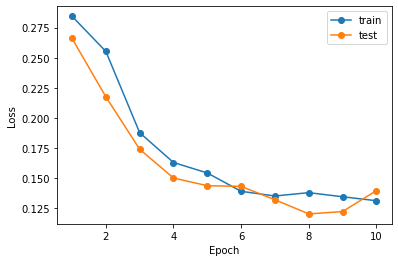

In [230]:
from collections.abc import Sequence
from importlib import reload  # Python 3.4+
import torch
import sys
from torch import nn
# !git clone https://github.com/eliazonta/AI-Challenge-HIT
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks/AnomalyDetection")
import LSTMs
LSTMs = reload(LSTMs)
from LSTMs import SingleLSTMCell,LSTM

device = torch.device("cuda")
sequence_length = dataset['train'][0]['features'].size(0)
pred_length = dataset['train'][0]['target'].size(0)
# Instantiate the model with hyperparameters
model = LSTM(input_size=1, output_size=1, hidden_dim=32, device = device)
# We'll also set the model to the device that we defined earlier (default is CPU)
# Daniele: Not sure if this is useless now, should check
model = model.to(device)
#model.load_state_dict(torch.load('T0065_rad_sol_model.pt', map_location=torch.device('cpu')))

# Define hyperparameters
lr = 5e-5

# Define Loss, Optimizer
criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_loss = []
test_loss = []

from tqdm import tqdm
n_epochs = 10
for epoch in range(1, n_epochs + 1):
    model.train()
    loss_train_batch = []
    for data in tqdm(dataloader['train'], leave=True, total=len(dataloader['train'])):
      # preparing the input
      batch_input_features = torch.stack([v["features"] for v in data]).to(device)
      target_features = torch.stack([v["target"] for v in data]).to(device)
      # feed the model
      output = model(batch_input_features,pred_length)
      output = output.to(device)[:,-pred_length:]
      loss_train = criterion(output, target_features)
      loss_train.backward() # Does backpropagation and calculates gradients
      optimizer.step() # Updates the weights accordingly
      loss_train_batch.append(loss_train.item())
    
    mean_train_loss = np.mean(loss_train_batch)
    model.eval()
    # preparing the input of test dataset
    data_test = next(iter(dataloader['test']))
    test_input_features = torch.stack([v["features"] for v in data_test]).to(device)
    test_target_features = torch.stack([v["target"] for v in data_test]).to(device)
    output_test = model(test_input_features,pred_length)[:,-pred_length:]
    loss_test = criterion(output_test, test_target_features)
    train_loss.append(mean_train_loss)
    test_loss.append(loss_test.item())
    print("Training Loss: {:.4f}".format(mean_train_loss))
    print("Test Loss: {:.4f}".format(loss_test.item()))

    if mean_train_loss < 0.05:
        break

import matplotlib.pyplot as plt

plt.plot(range(1, n_epochs + 1),train_loss,'o-',label="train")
plt.plot(range(1, n_epochs + 1),test_loss,'o-',label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [231]:
savewk = '/content/drive/My Drive/10. Meteotrentino/'
torch.save(model.state_dict(), savewk+"TrainedModels/"+station+"_"+quantity+"_model.pt")

In [234]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

sample = dataset["train"]
### use below a list of min and max indexes in case of memory overflow, otherwise set to none
restriction = None
def extract_quantity_from_dataset(dataset,label_of_quantity,indexes=None,device='cpu'):
  # returns a pytorch array of the given quantity
  # optional: restrict the dataset to some indexes (for memory allocation reasons)
  if(indexes):
    pt_tensor = torch.stack([dataset[i][label_of_quantity] for i in range(min(indexes),max(indexes)+1)]).to(device)
  else: pt_tensor = torch.stack([v[label_of_quantity] for v in dataset]).to(device)
  return pt_tensor

sample_tensor_validation = extract_quantity_from_dataset(sample,"labels",restriction)

sample_tensor_features = extract_quantity_from_dataset(sample,"features",restriction,device=device) 

sample_tensor_target = extract_quantity_from_dataset(sample,"target",restriction,device=device)

sensor_code = [v['sensor_code'] for v in sample][0]
date = pd.to_datetime([v['date'] for v in sample]).strftime("%d/%m/%Y %H:%M") 

model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features,pred_length)

# Find the data with highest loss
criterion = nn.MSELoss(reduction='none')
TOP_K_loss = 10
loss = criterion(reconstructed[:,-pred_length:], sample_tensor_target).mean(dim=1)
top_loss, top_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0)
# # confidence interval
# # rolling mean over n_steps
# n_steps = 3
# time_series_df = pd.DataFrame(original_signal)
# line = time_series_df.rolling(n_steps).mean()
# # 98% confidence
# line_deviation = 2.326 * time_series_df.rolling(n_steps).std()
# under_line = (line - line_deviation)[0]
# over_line = (line + line_deviation)[0]


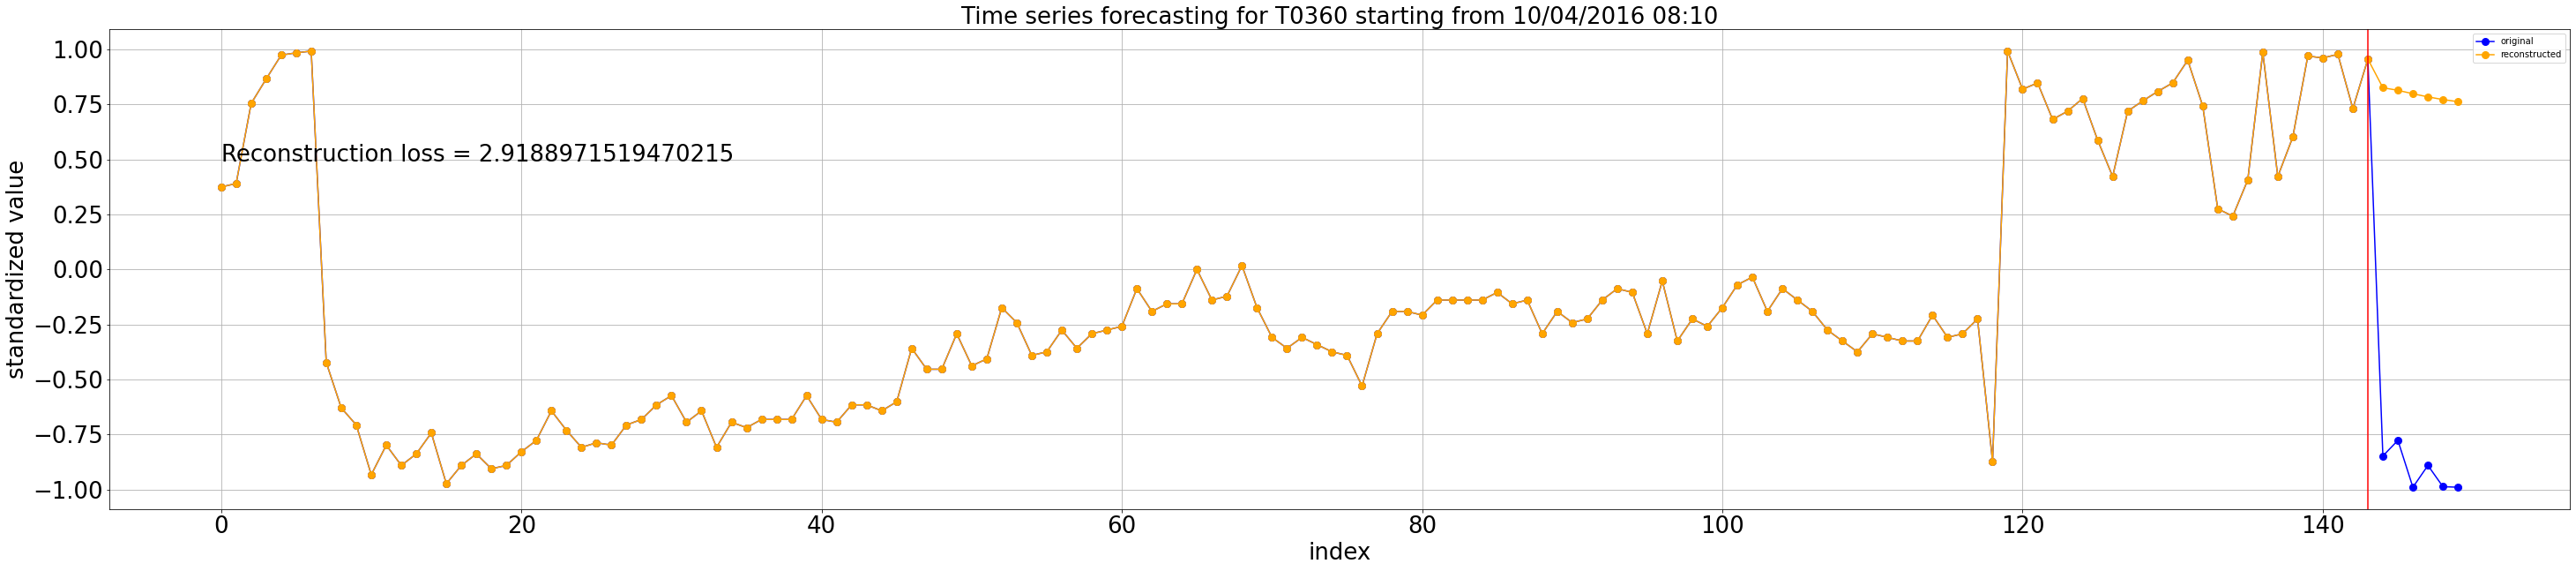

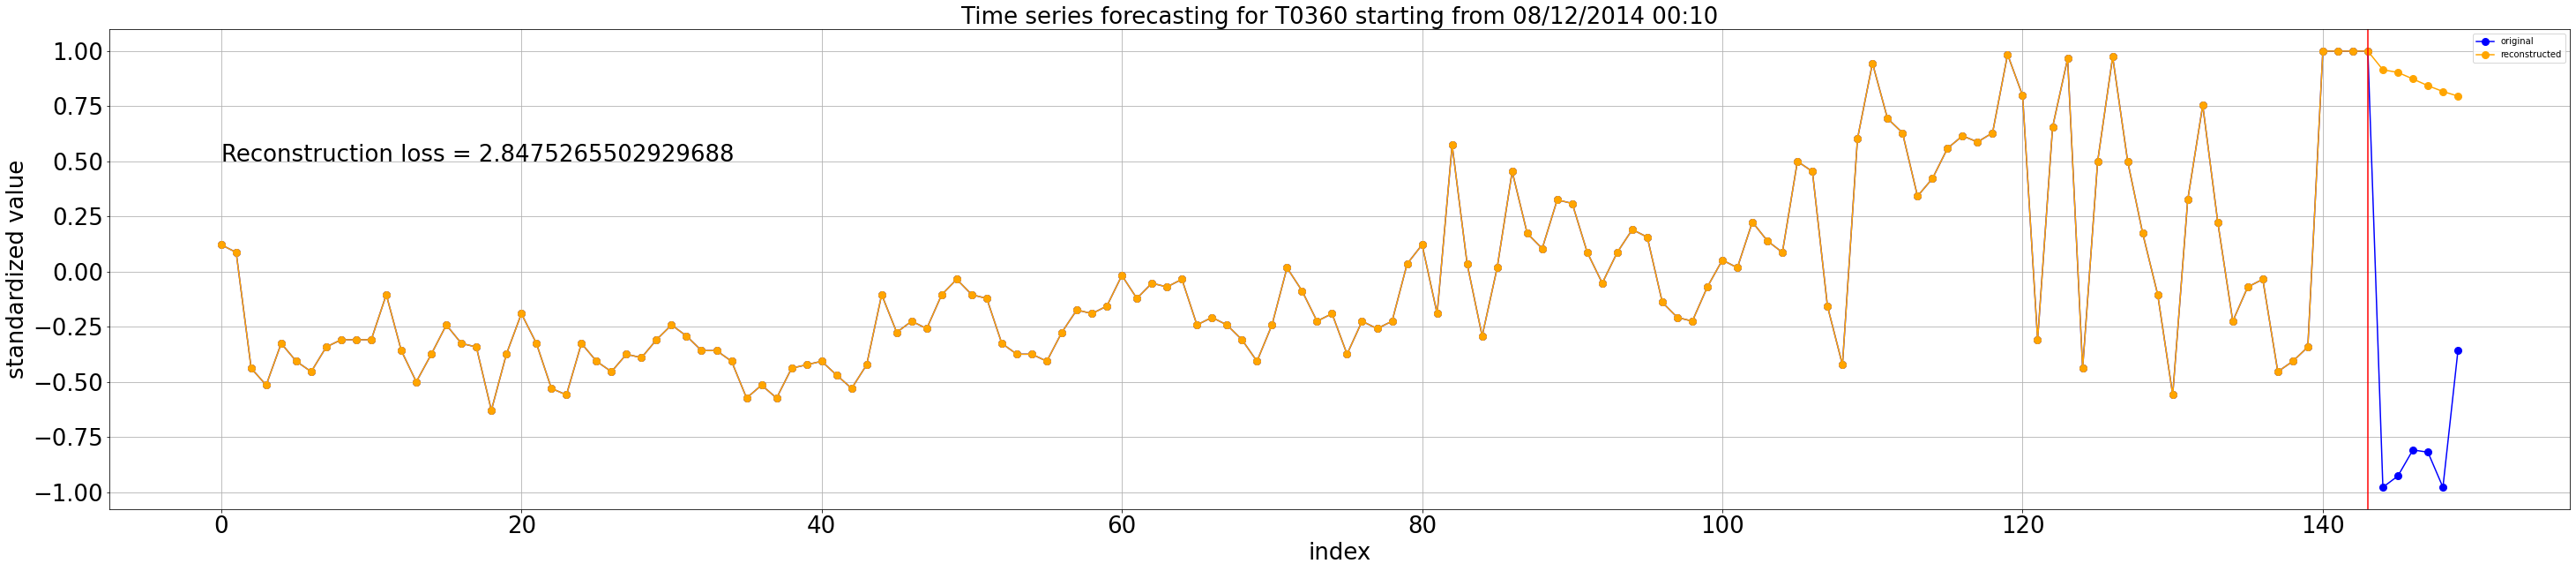

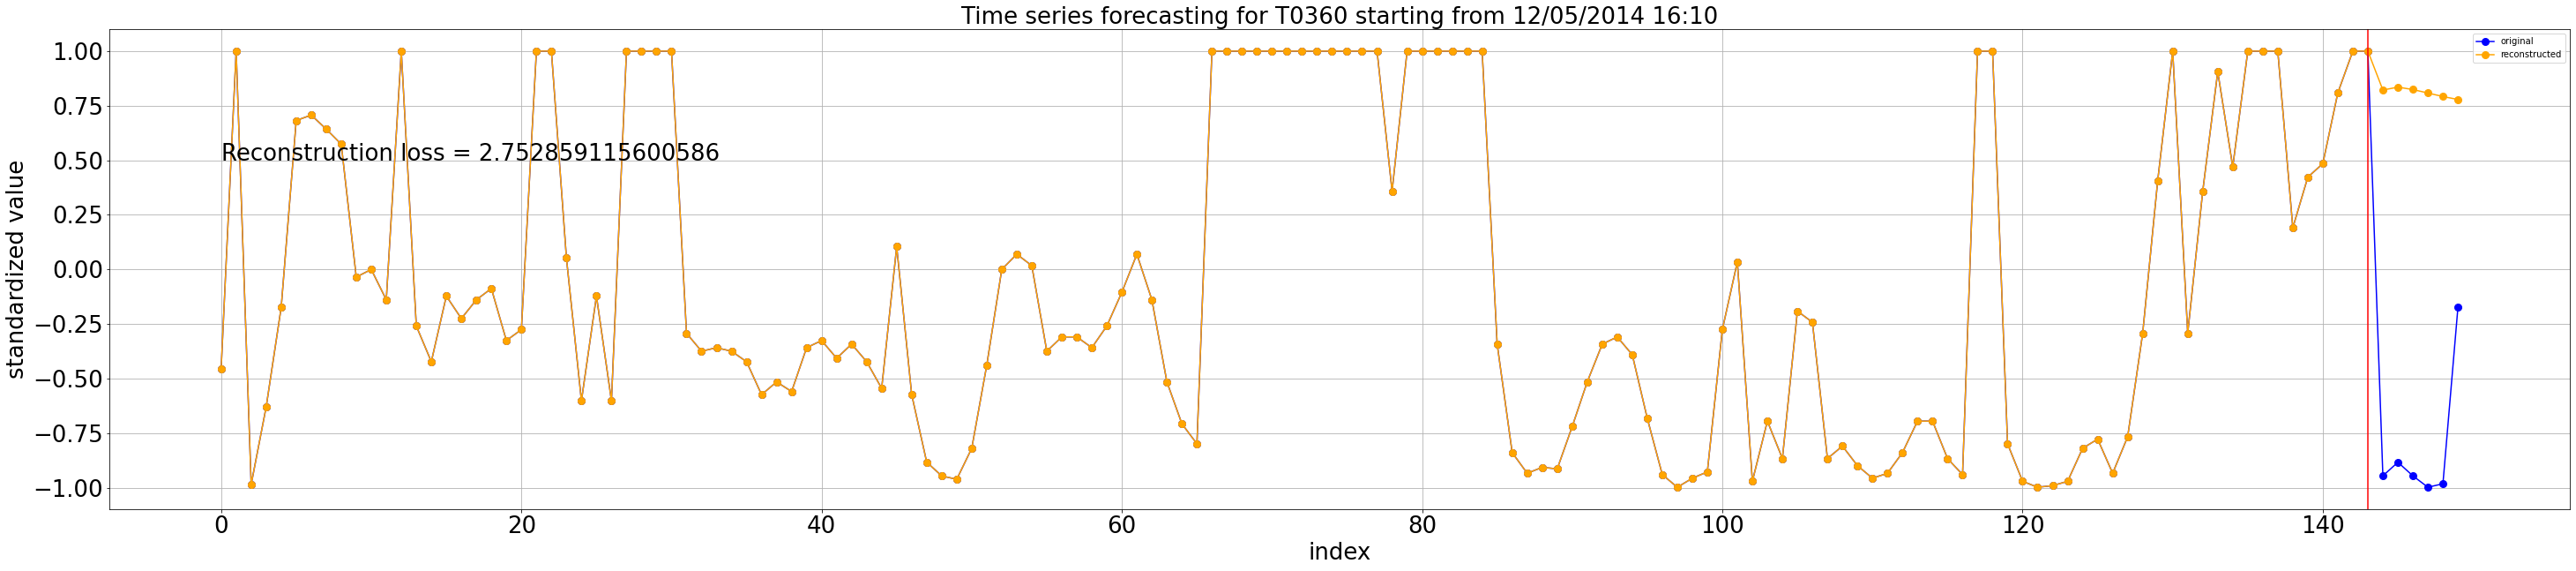

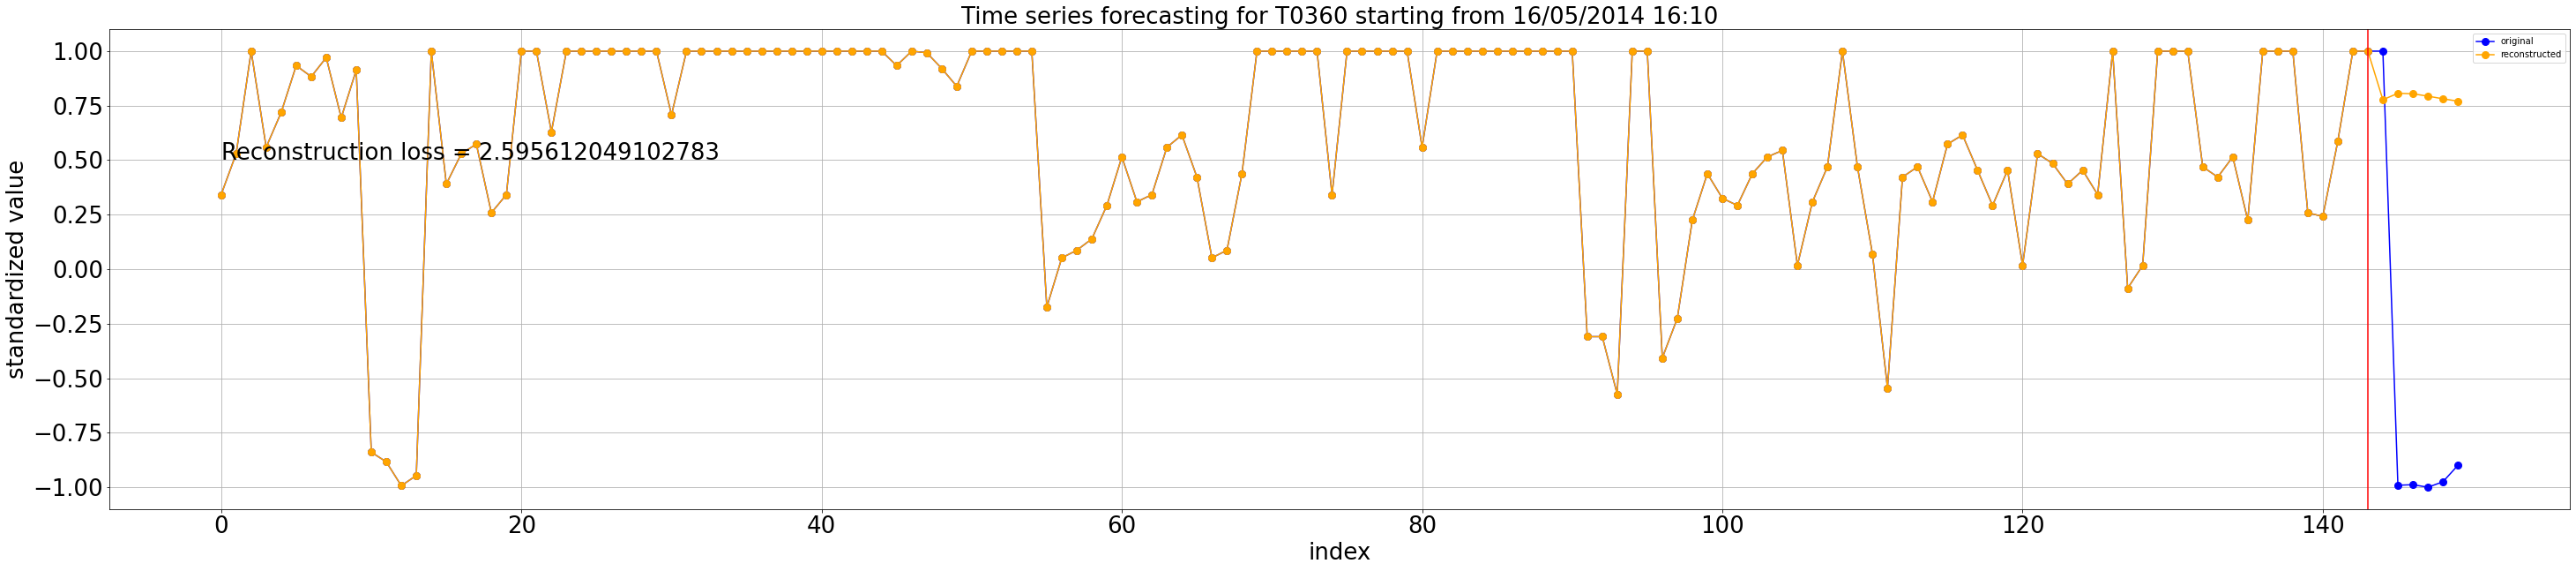

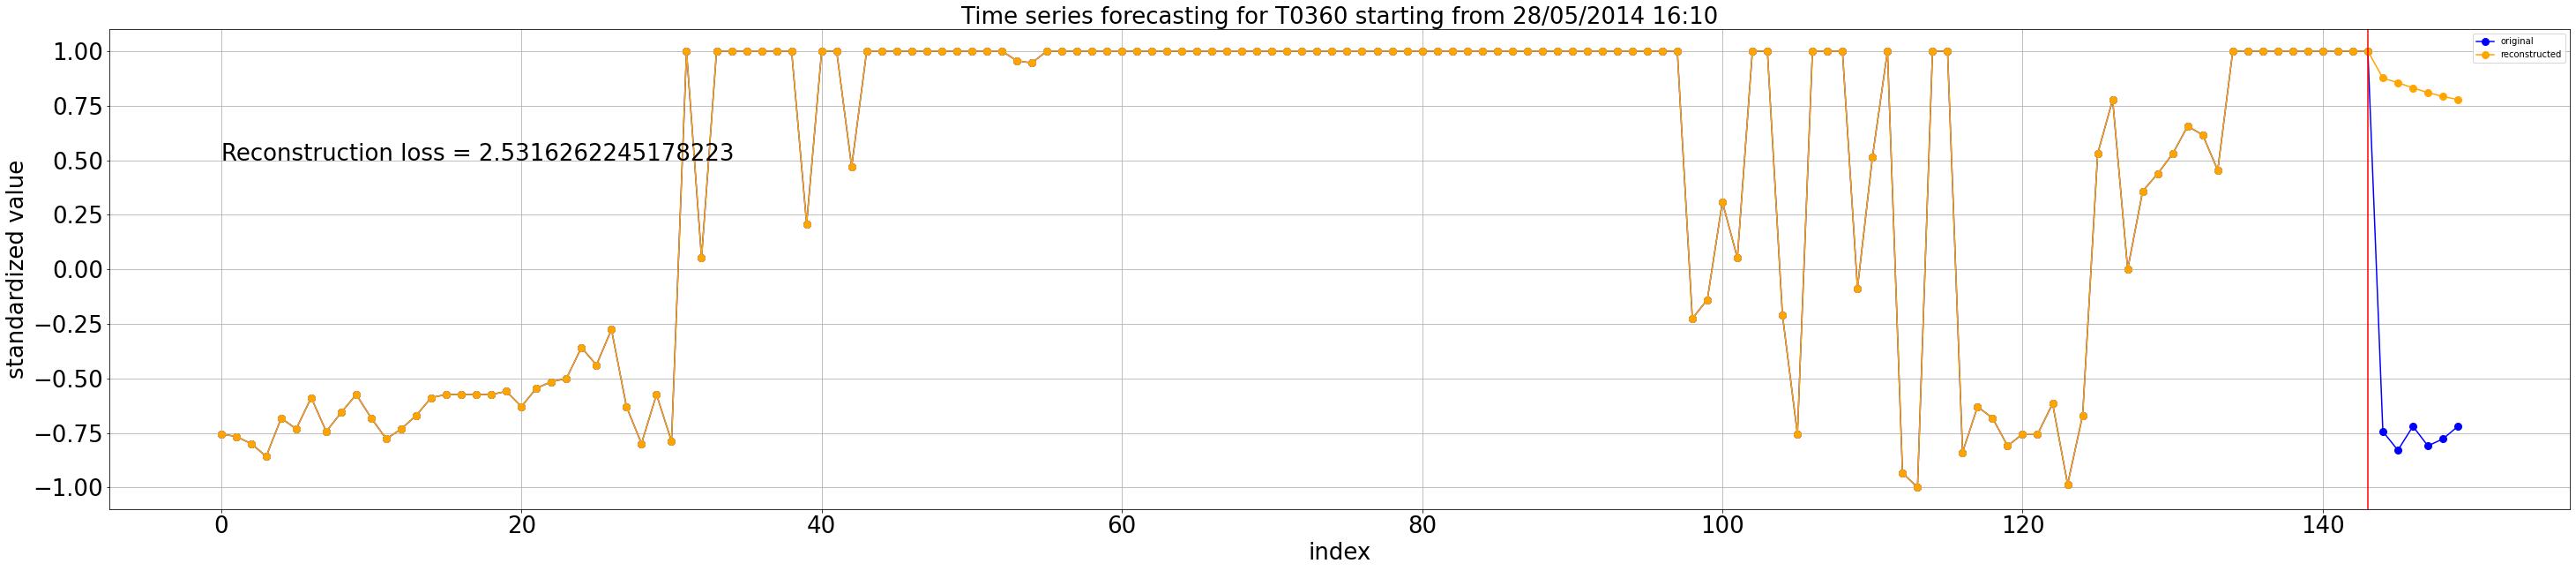

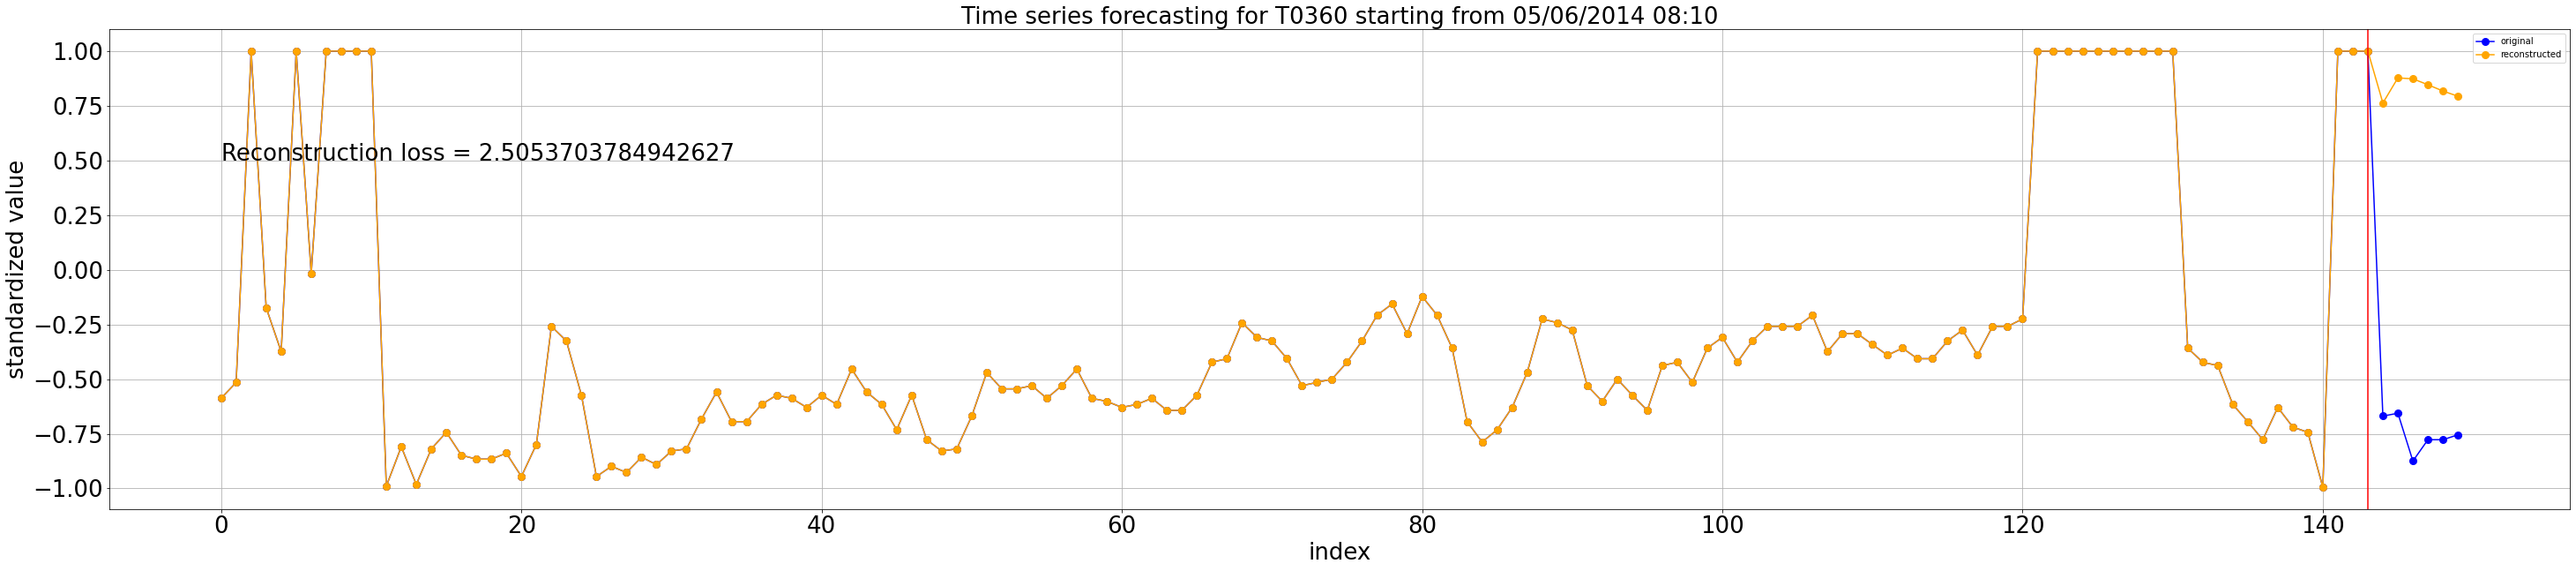

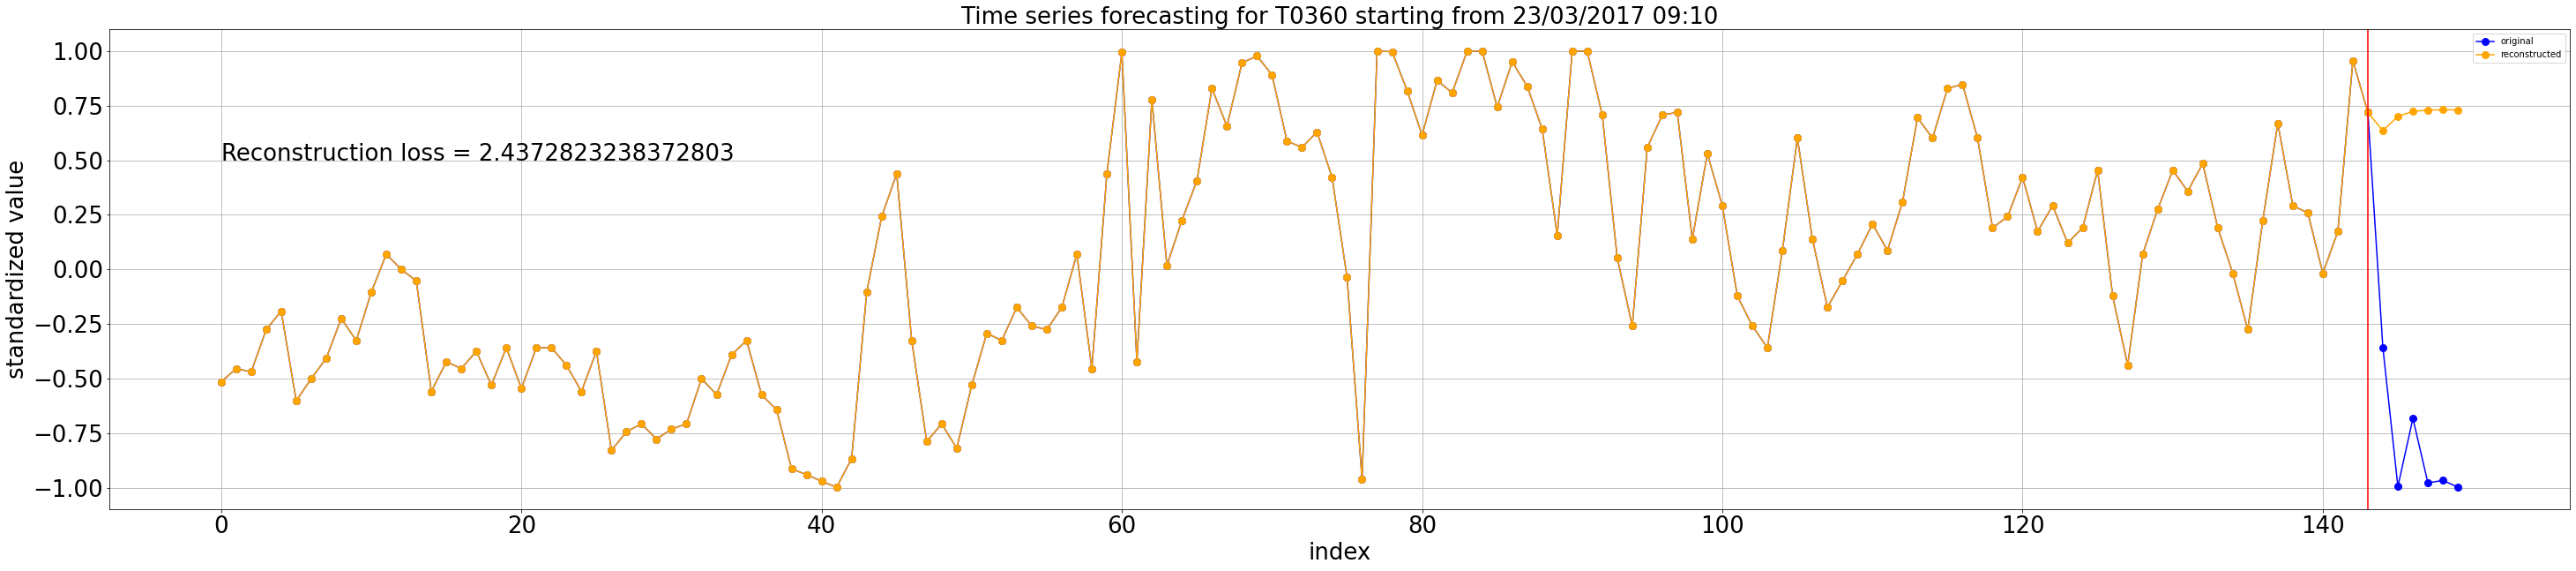

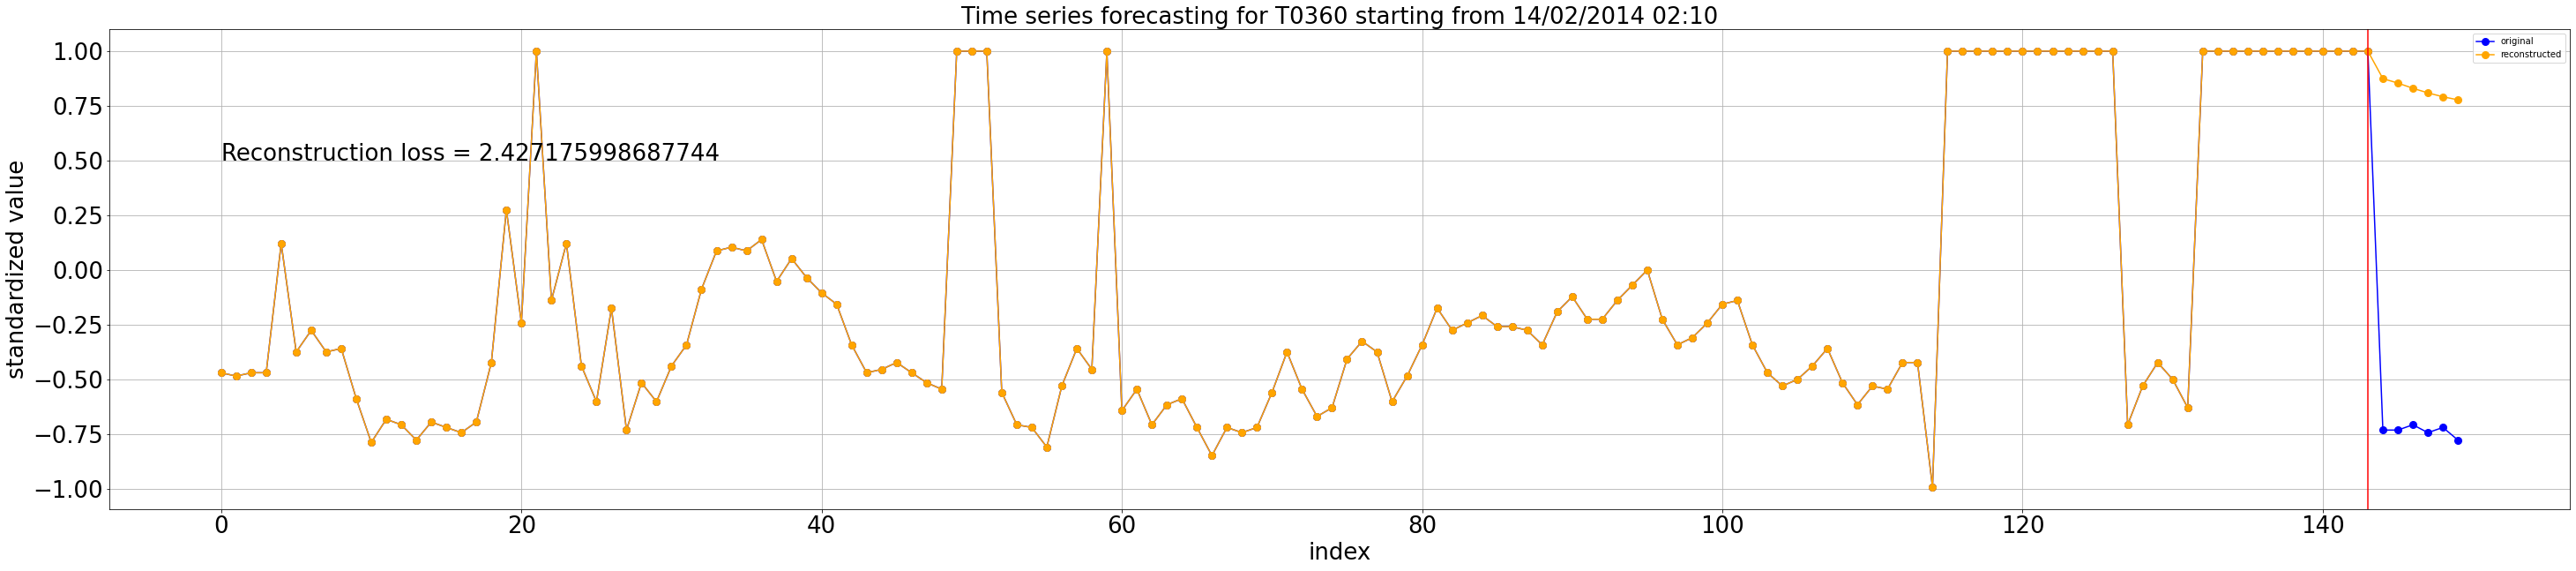

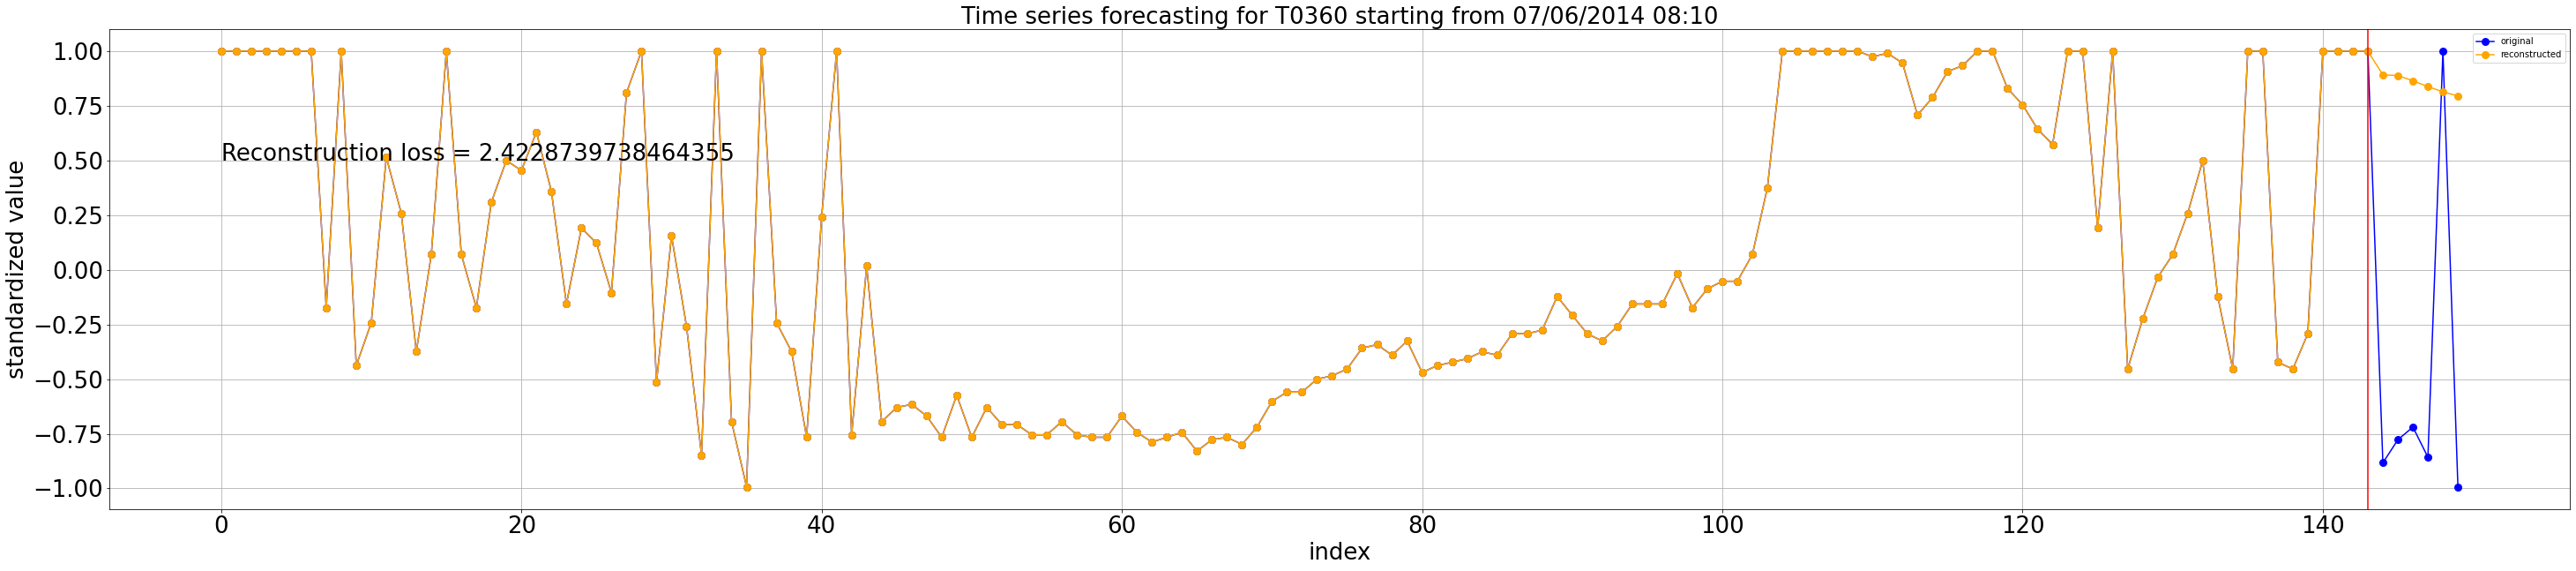

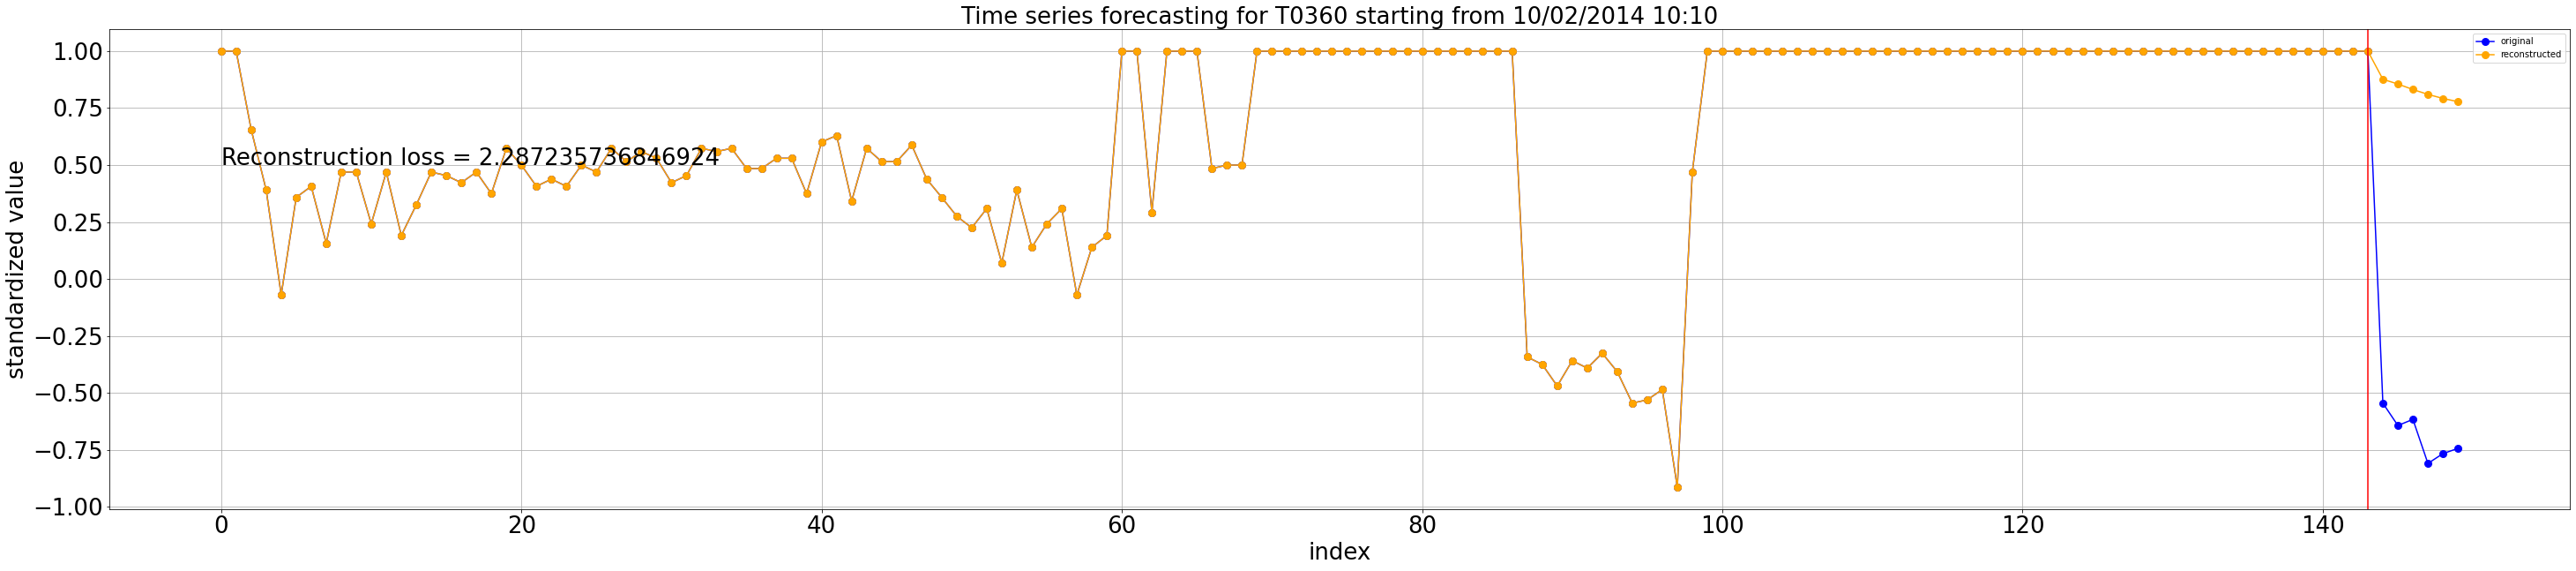

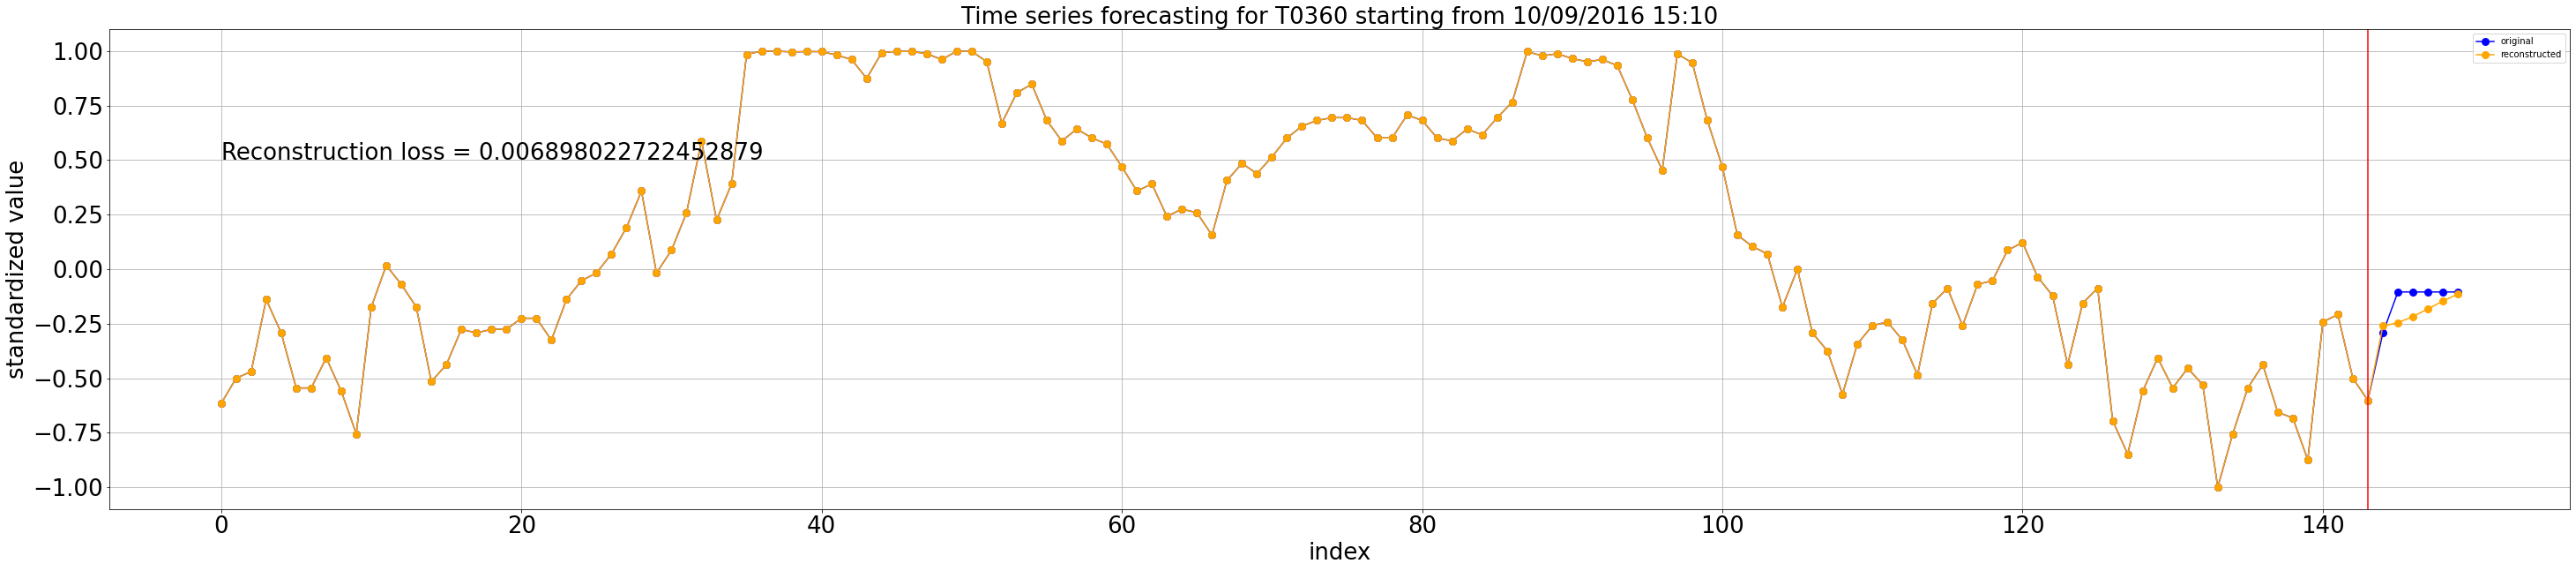

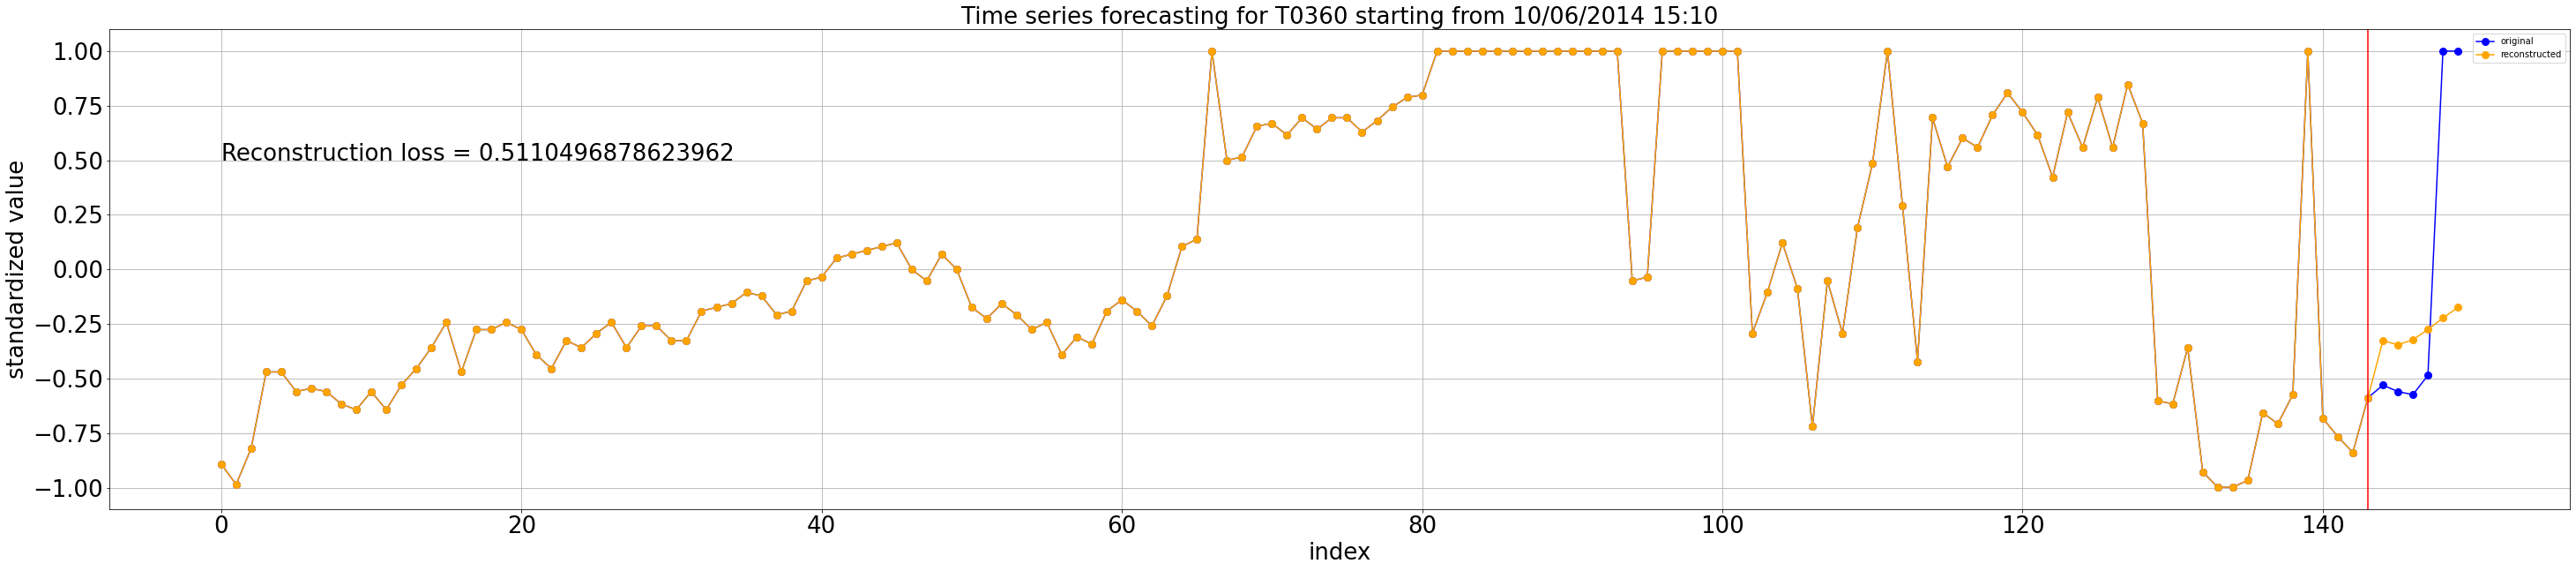

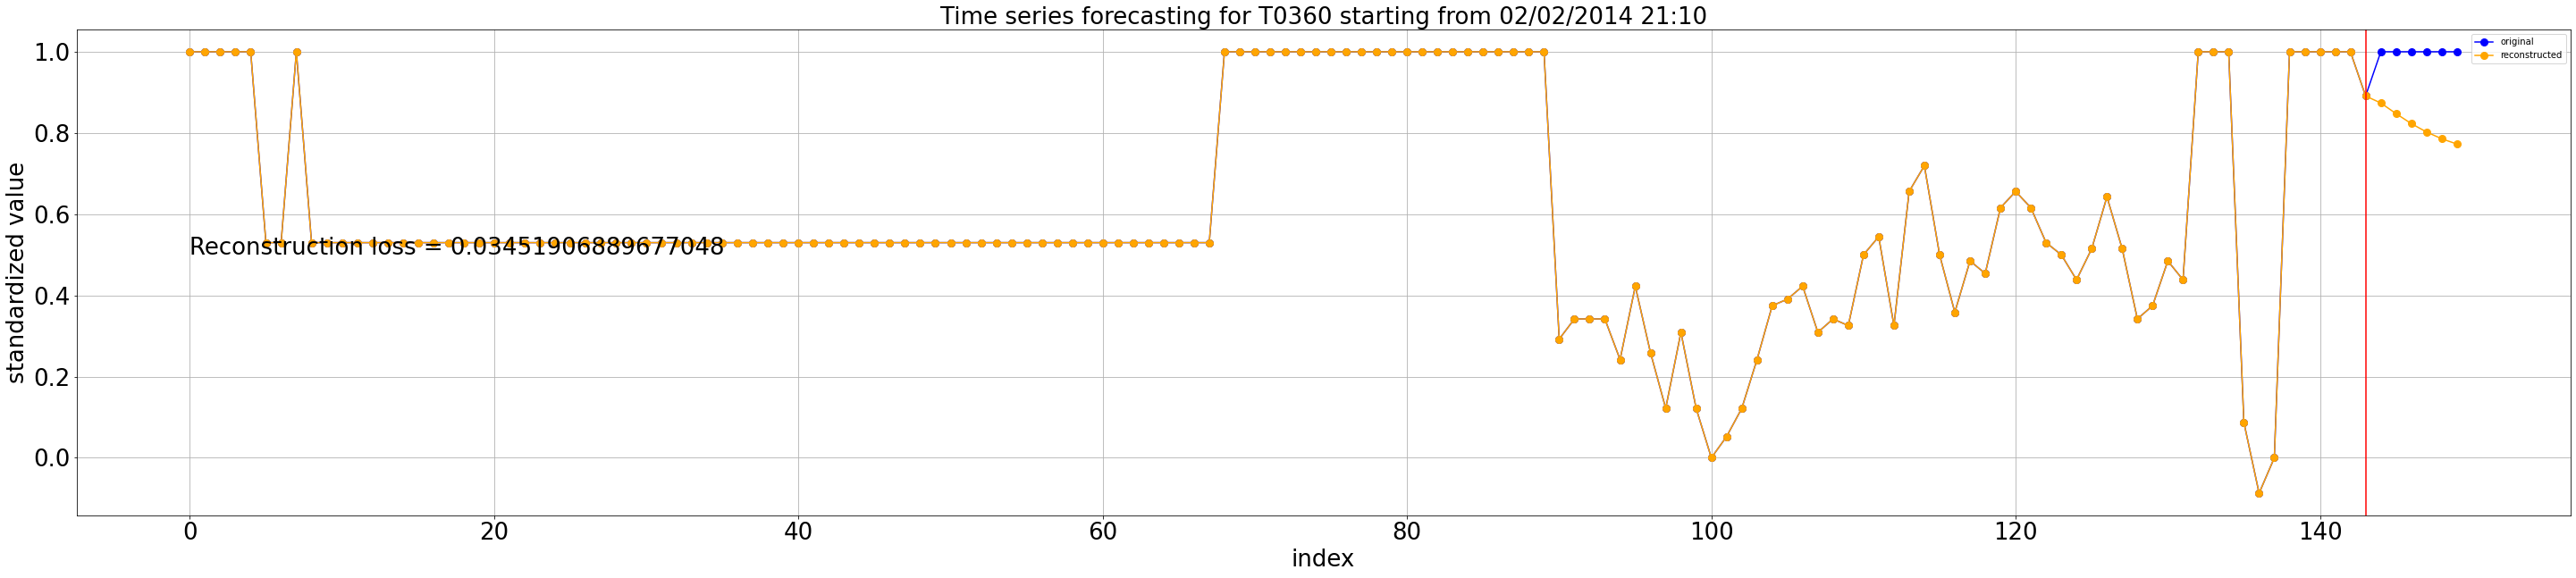

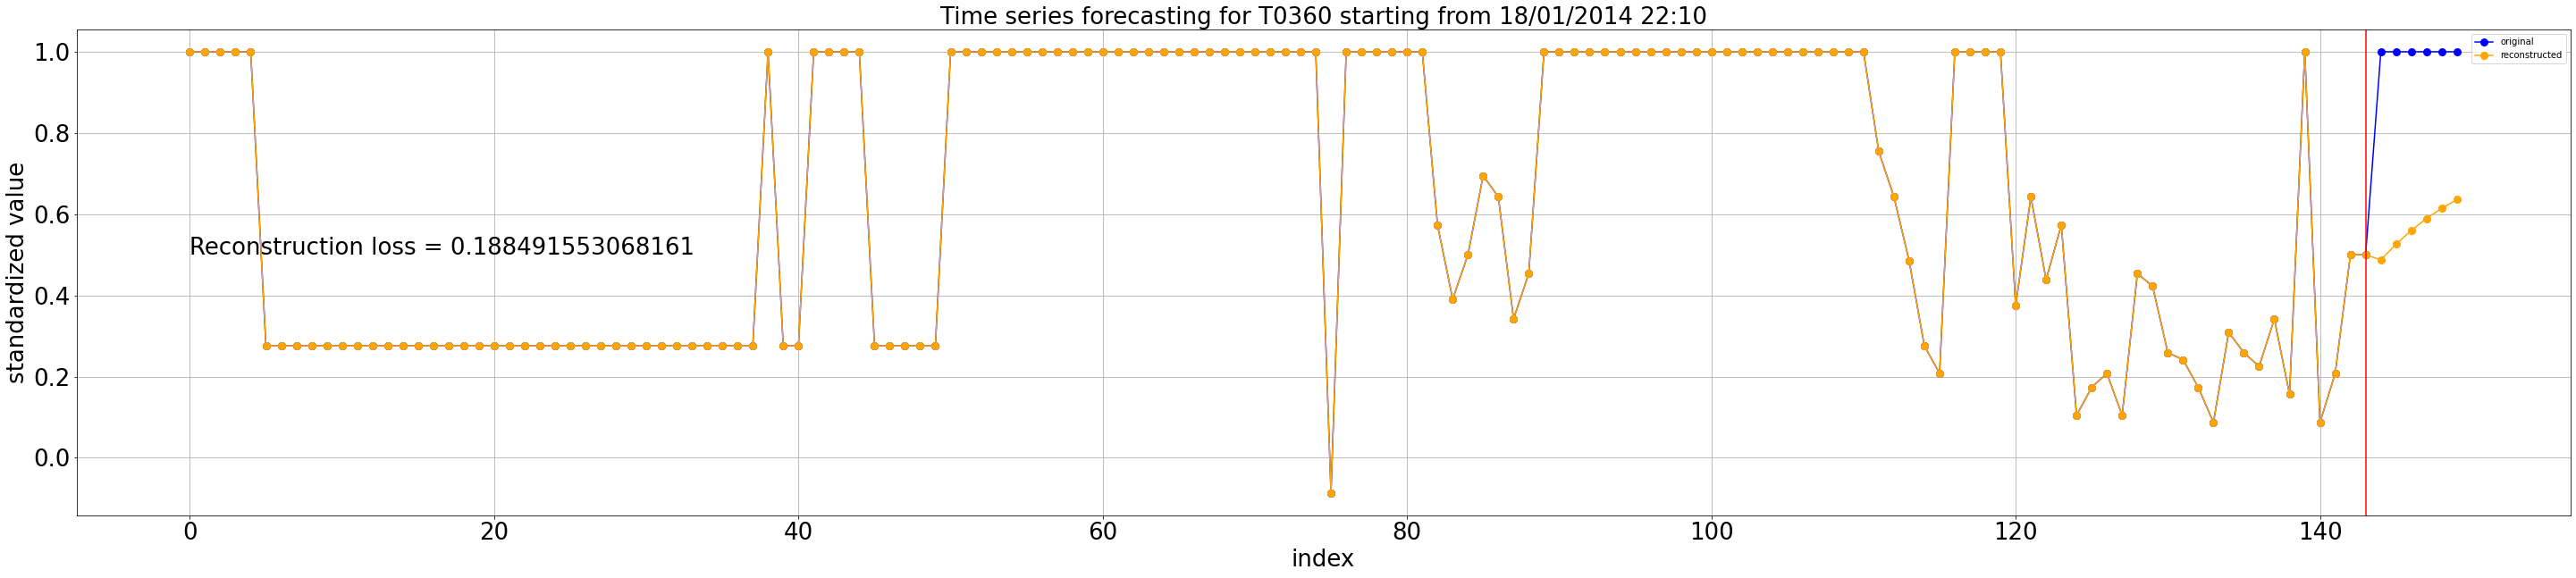

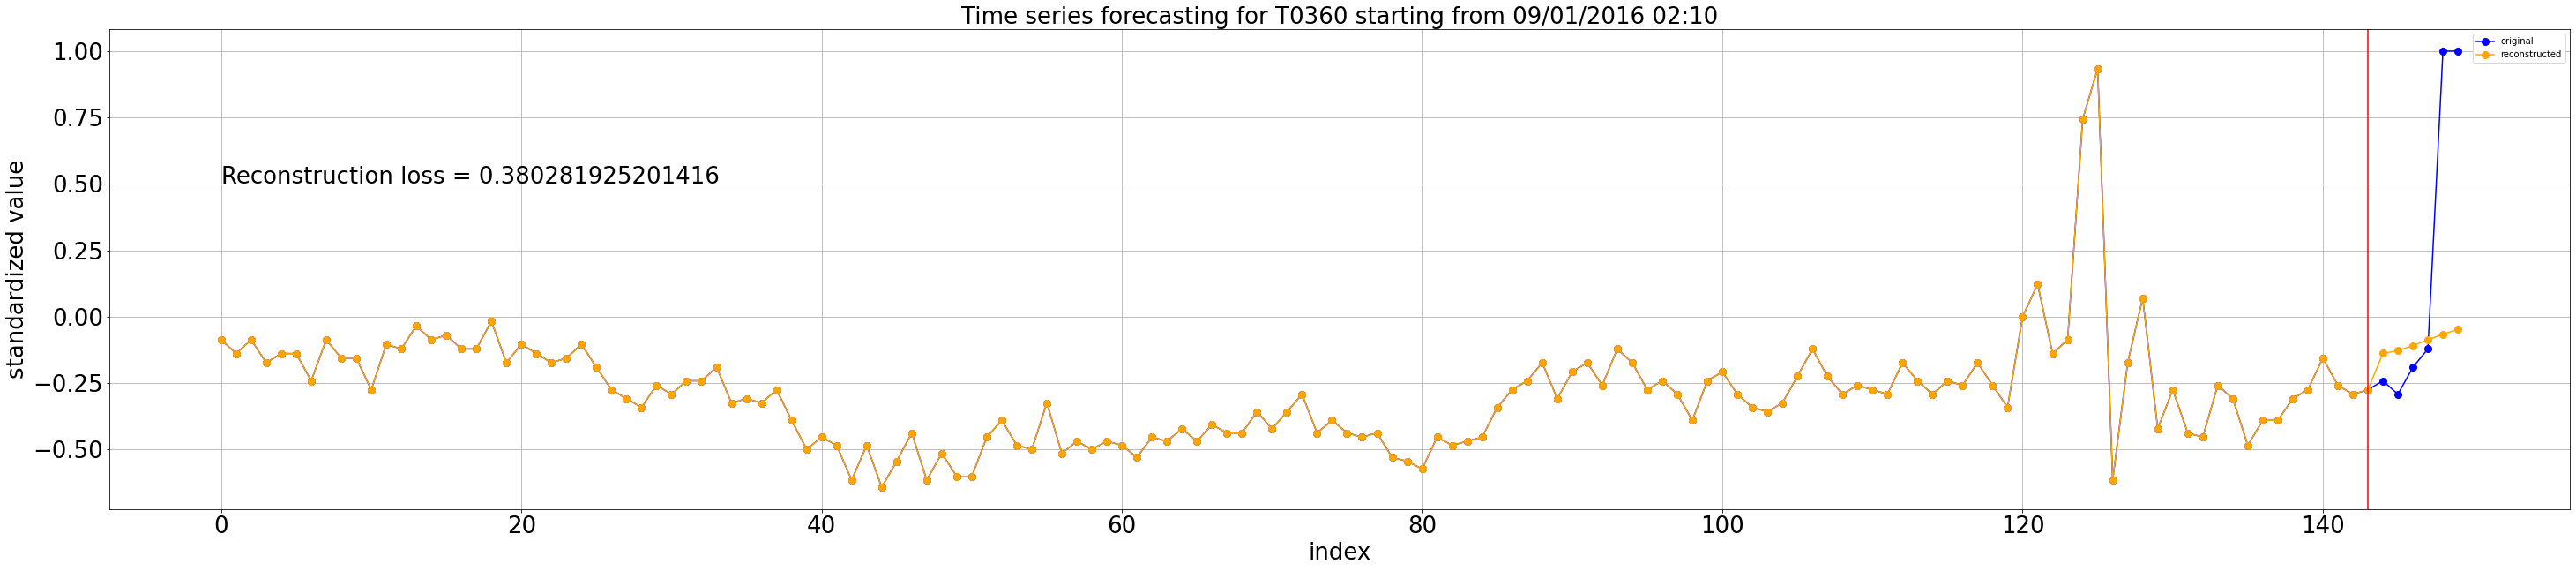

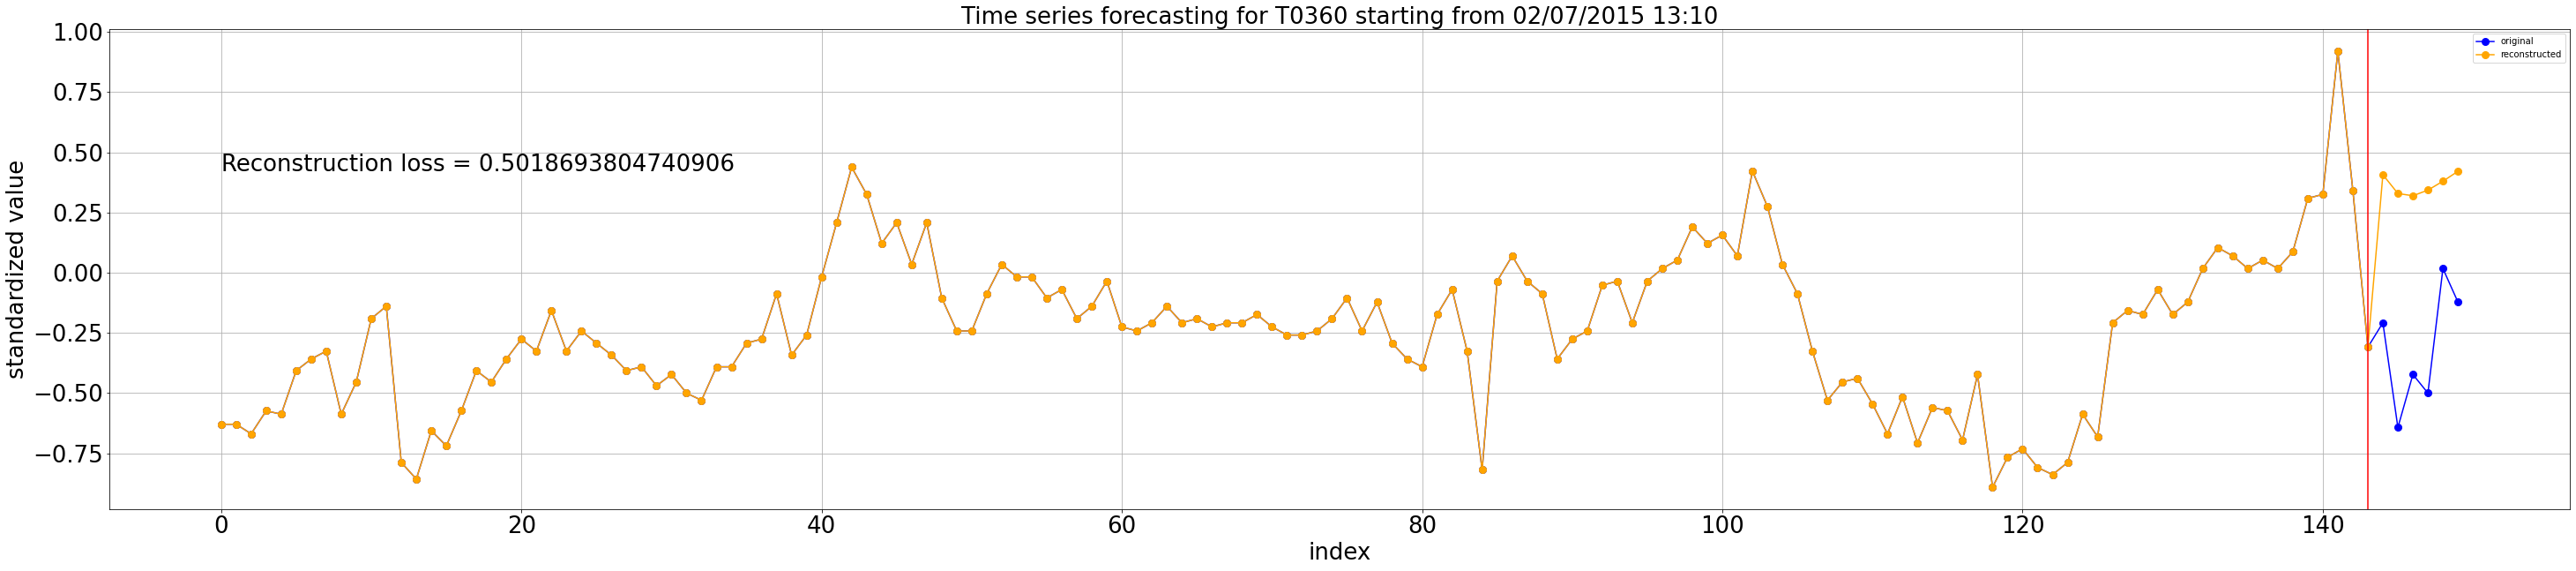

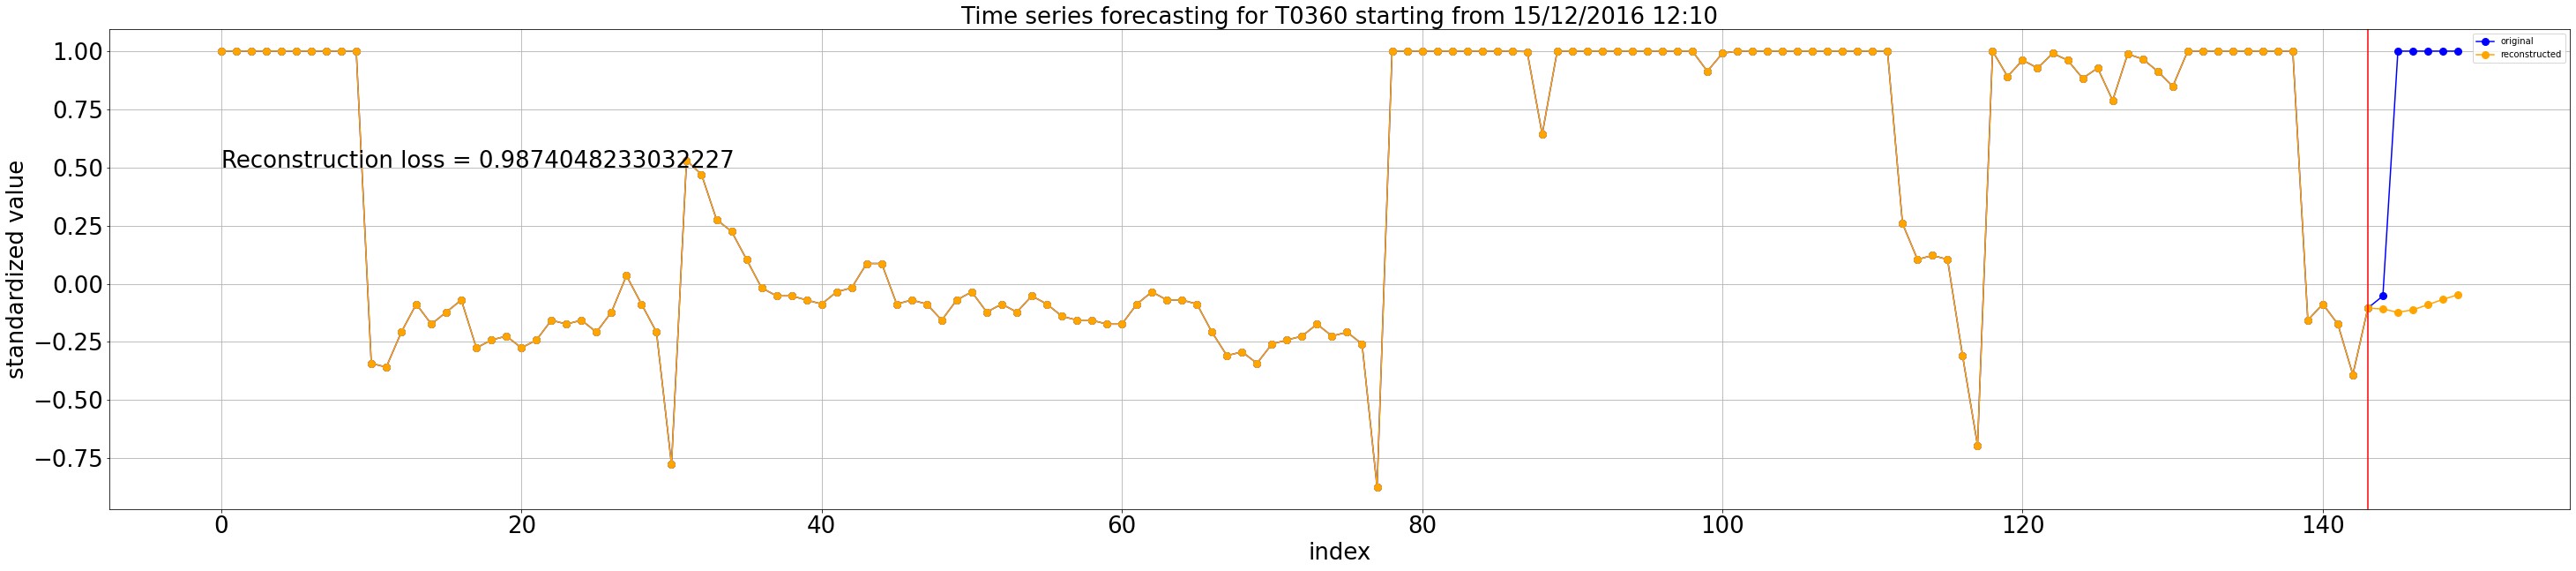

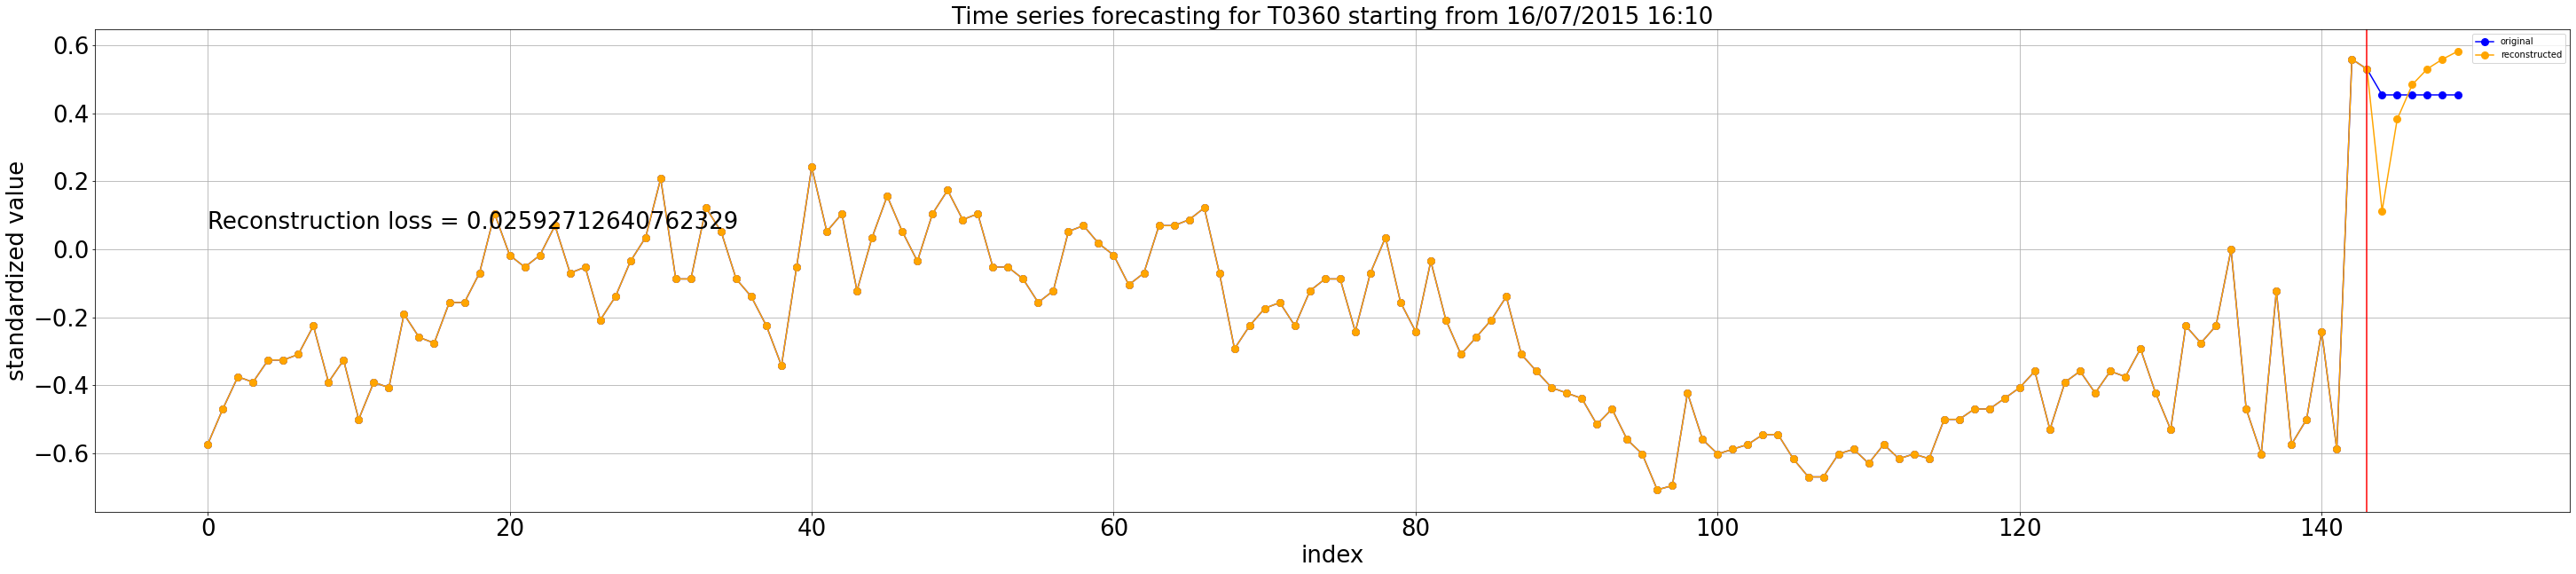

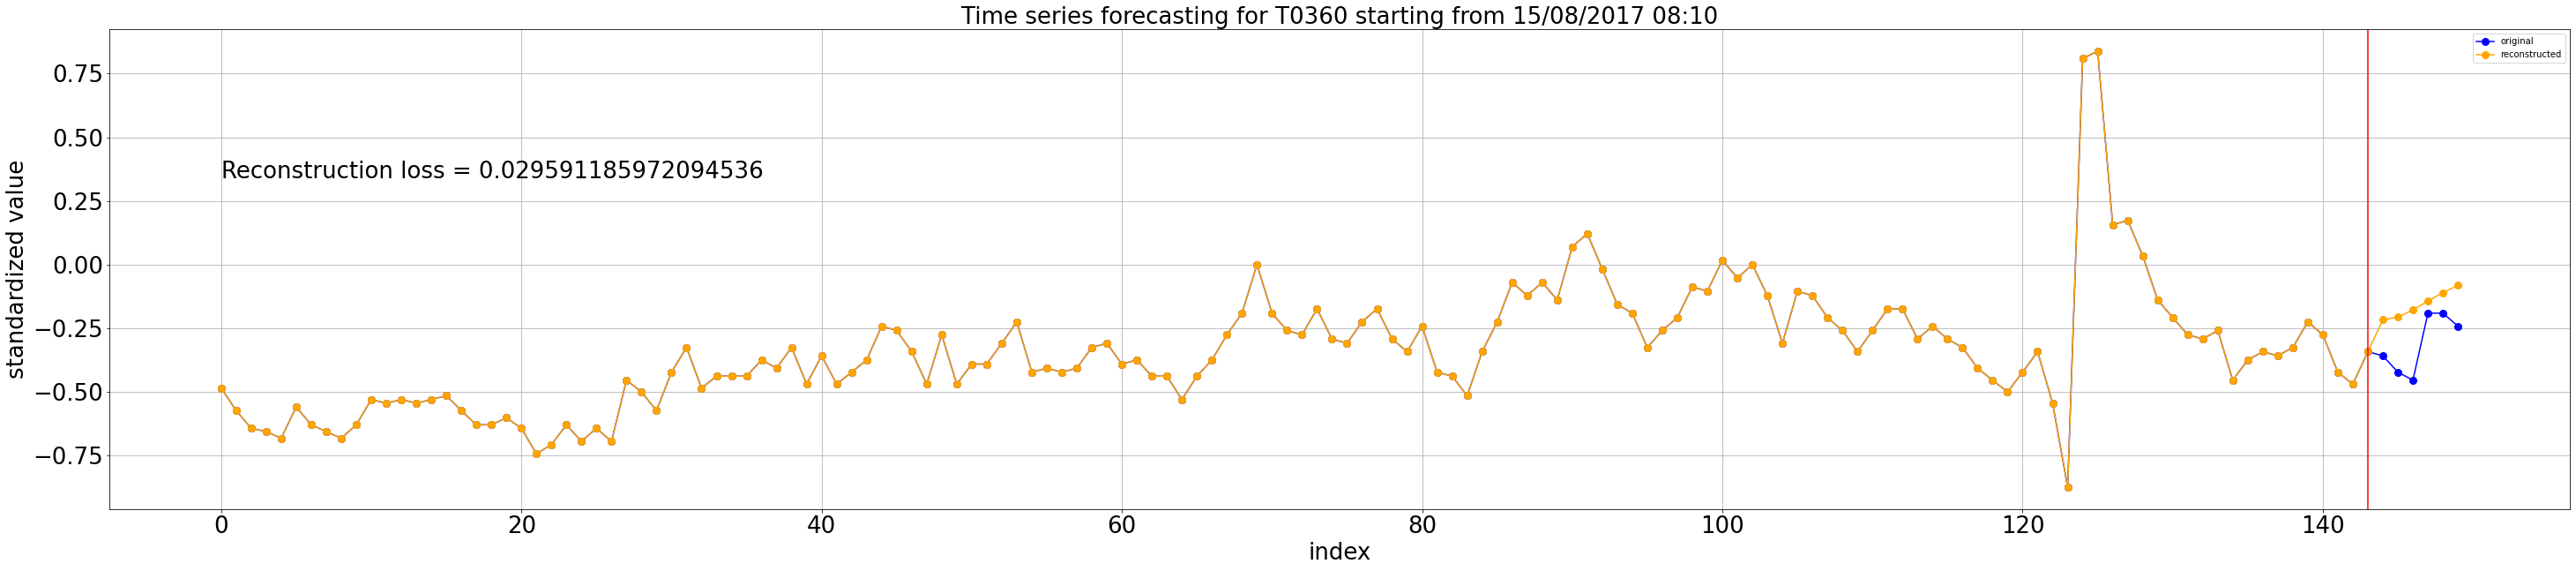

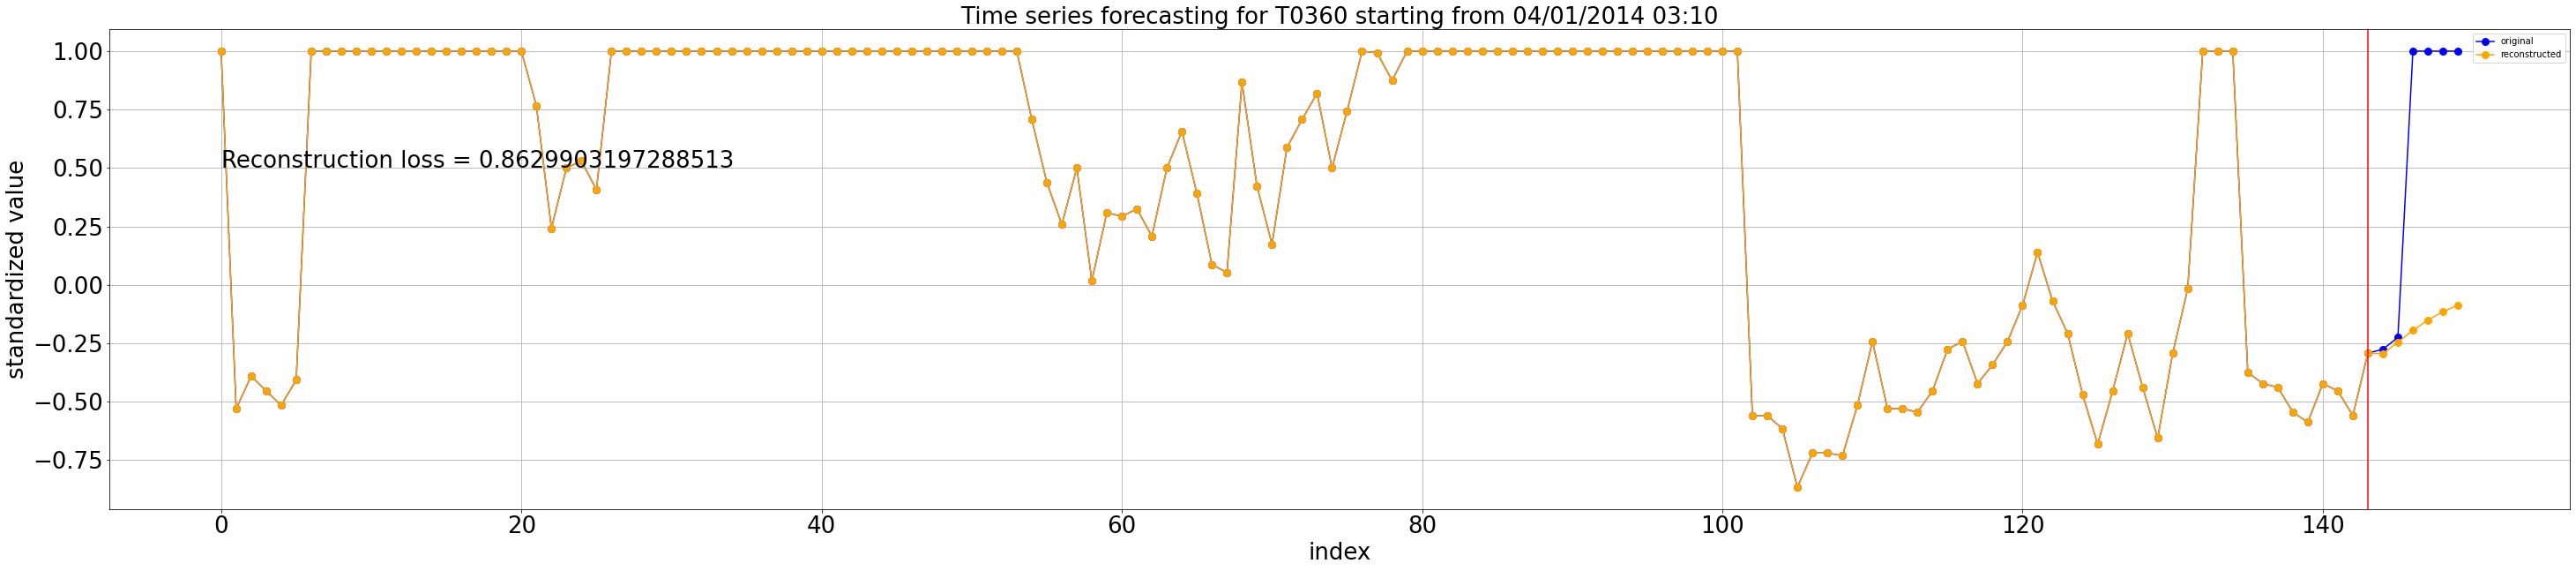

In [236]:
top_loss_indexes_list = list(top_loss_indexes.cpu().numpy())
# append validated anomalies (to be cleaned)
validated_anomalies = list(np.unique((sample_tensor_validation != 1).nonzero(as_tuple=True)[0].numpy()))
top_loss_indexes_list.extend(validated_anomalies)
for i in top_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, sample_tensor_target[i].to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features, sample_tensor_target), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = "original")
  plt.text(0,max(original_signal)-0.5,f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot(reconstructed[i].to("cpu"),"o-",ms=8,color="orange", label = "reconstructed")
  # plt.plot(np.arange(94,100), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=143, color='red')
  plt.grid()
  plt.legend()
  # plt.savefig('T0010_temperature_anomaly.pdf')


In [237]:
model.eval()
with torch.no_grad():
    reconstructed = model(sample_tensor_features,pred_length)

print(reconstructed.shape)
print(pred_length)
print(sample_tensor_features.shape)
print(len(sample))

torch.Size([17519, 150])
6
torch.Size([17519, 144])
17519


In [242]:
# fixme better
sample_tensor_features_arr = []
sample_tensor_target_arr = extract_quantity_from_dataset(sample,"target",None,device=device)
for k in [[0,len(sample)-1]]:# [20001,40000], [40001, len(sample)-1]]:
  sample_tensor_features = extract_quantity_from_dataset(sample,"features", k ,device=device) 
  sample_tensor_features_arr.append(sample_tensor_features)

In [243]:
sample_tensor_features_total = torch.cat([a for a in sample_tensor_features_arr])
print(sample_tensor_features_total)
print(sample_tensor_features_total.shape)
print(sample_tensor_target_arr.shape)

tensor([[-0.9063, -0.9781, -0.8829,  ...,  0.3420,  1.0000,  1.0000],
        [ 0.0698, -0.1564, -0.1392,  ...,  0.2924,  0.9903, -0.1392],
        [-0.3090, -0.2756, -0.3907,  ...,  0.0698,  0.1564,  0.1392],
        ...,
        [-0.1219, -0.1045,  0.1045,  ...,  0.2756,  0.2250,  0.1045],
        [-0.4067, -0.2756, -0.2250,  ..., -0.5736, -0.6691, -0.5736],
        [-0.9994, -0.8660, -0.7880,  ..., -0.3584,  0.1564, -0.1736]],
       device='cuda:0')
torch.Size([17519, 144])
torch.Size([17519, 6])


In [245]:
model.eval()
reconstructed_arr = []
with torch.no_grad():
    for sample_tensor_features in sample_tensor_features_arr:
      reconstructed = model(sample_tensor_features,pred_length)
      reconstructed_arr.append(reconstructed)
print(reconstructed.shape)
print(pred_length)
print(sample_tensor_features.shape)

torch.Size([17519, 150])
6
torch.Size([17519, 144])


In [246]:
reconstructed_total = torch.cat([x for x in reconstructed_arr])
print(reconstructed_total.shape)

torch.Size([17519, 150])


In [247]:
# Find the data with highest loss
criterion = nn.MSELoss(reduction='none')
#sample_tensor_target = extract_quantity_from_dataset(sample,"target", k ,device=device) 
#print(sample_tensor_target.size())
loss = criterion(reconstructed_total[:,-pred_length:], sample_tensor_target_arr).mean(dim=1)

In [248]:
arr = loss.cpu().detach().numpy()
print(arr.shape)

(17519,)


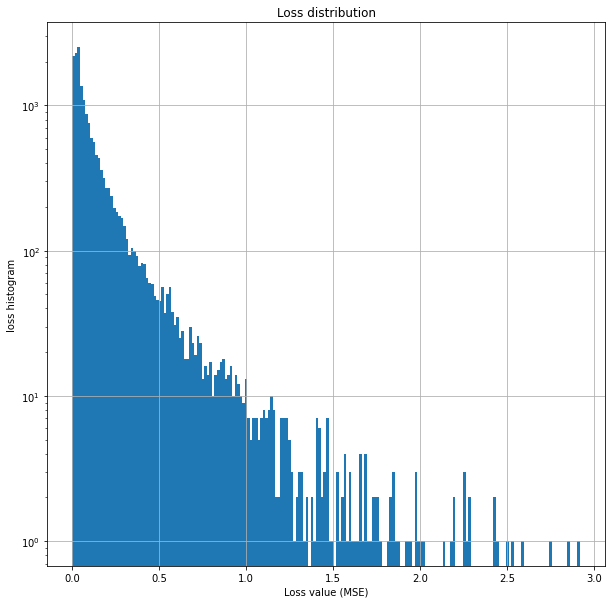

In [249]:
plt.figure(figsize=[10,10])
plt.hist(arr, bins = 200)
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution")
plt.grid()
plt.show()

In [259]:
sample_tensor_validation_tot = extract_quantity_from_dataset(dataset['train'],"labels",None,device=device)
bool_validation = np.any(sample_tensor_validation_tot.cpu().numpy()!=1,axis=1)
val,counts = np.unique(bool_validation,return_counts=True)

In [264]:
indexes_anomalies = np.where(bool_validation)[0]
print(loss[bool_validation])

tensor([0.0069, 0.5110, 0.0345, 0.1885, 0.3803, 0.5019, 0.9874, 0.0259, 0.0296,
        0.8630], device='cuda:0')


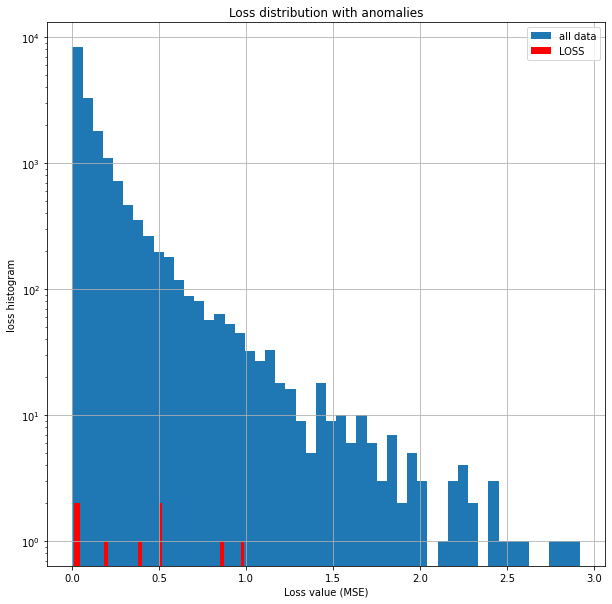

In [271]:
plt.figure(figsize=[10,10])
N_BINS = 50
plt.hist(arr, bins = N_BINS, label = 'all data')
plt.hist(loss[bool_validation].cpu(), bins = N_BINS, label = 'LOSS', color = 'red')
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution with anomalies")
plt.grid()
plt.legend()
plt.show()

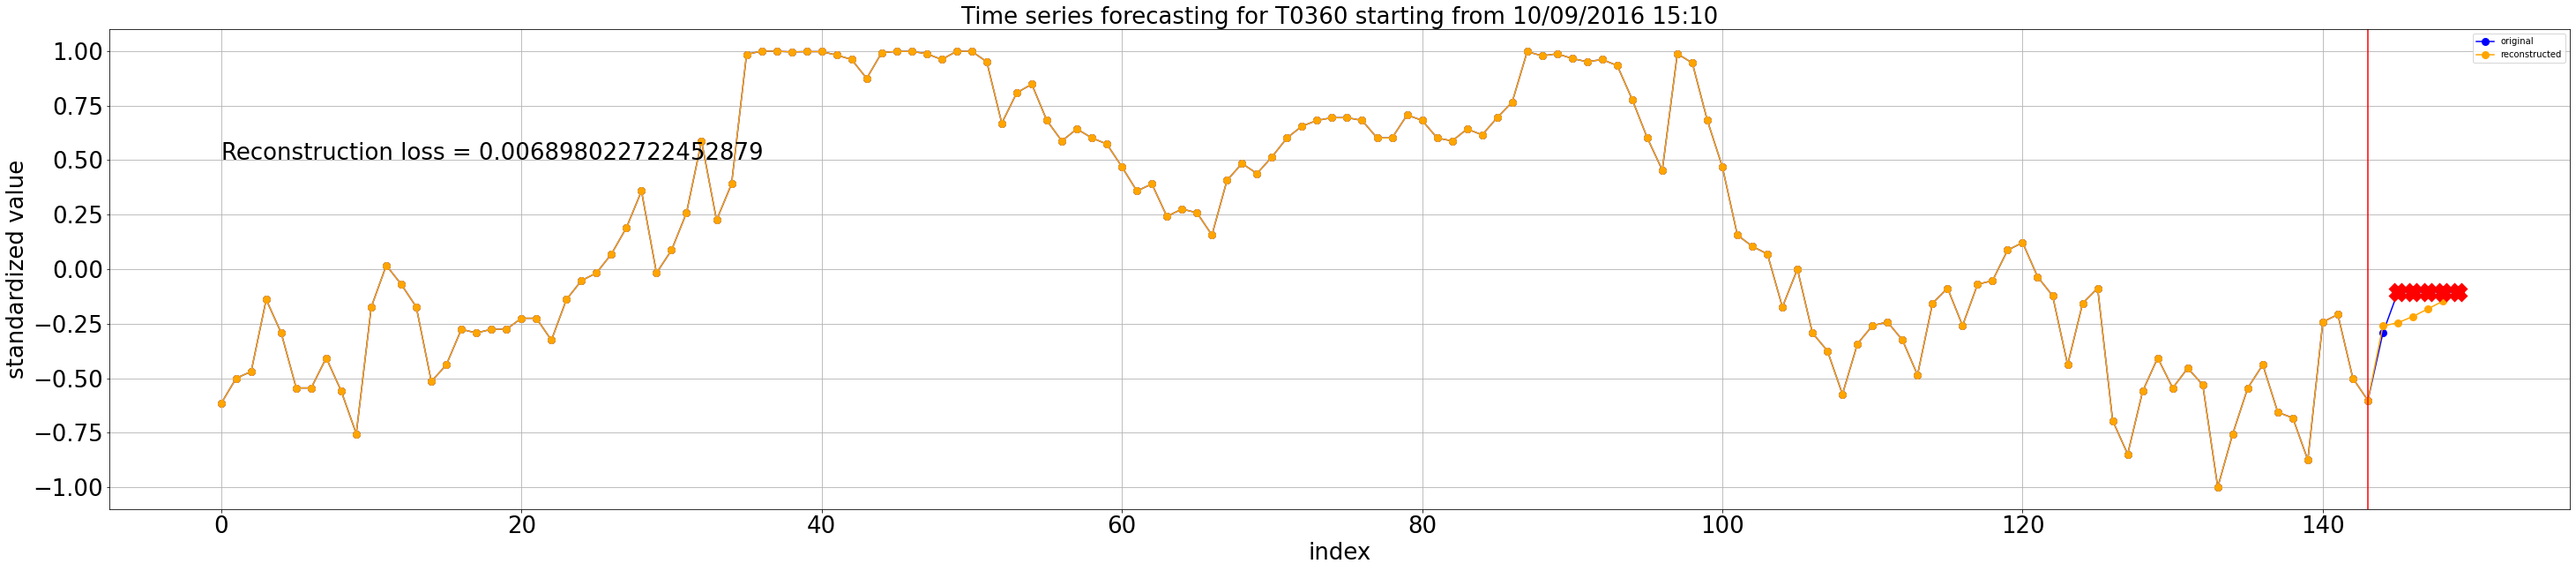

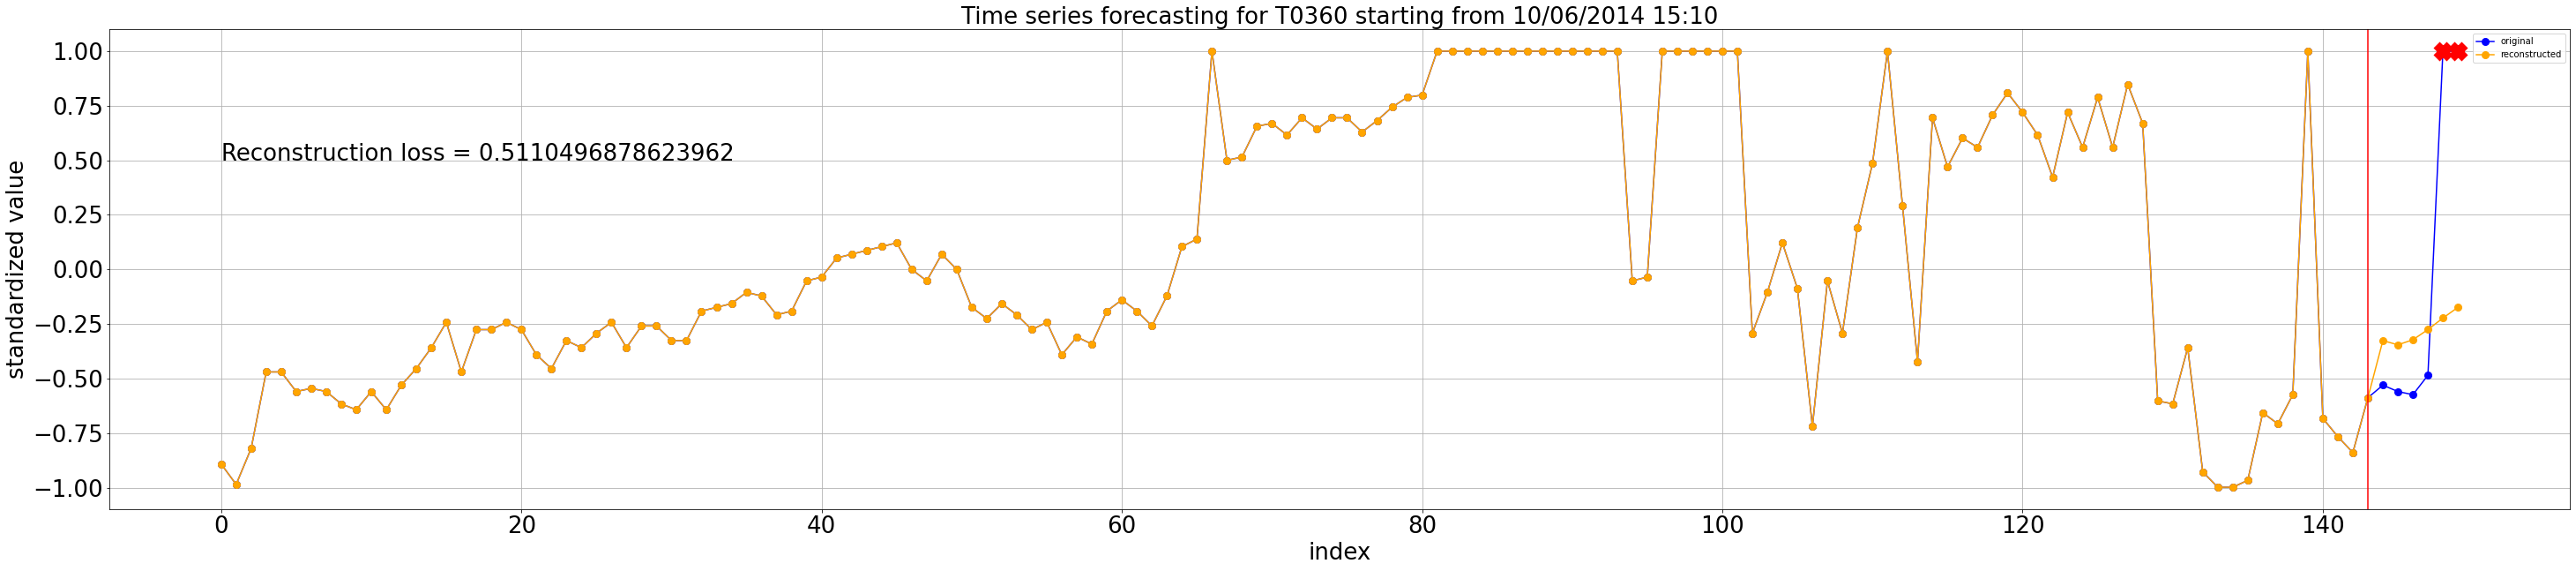

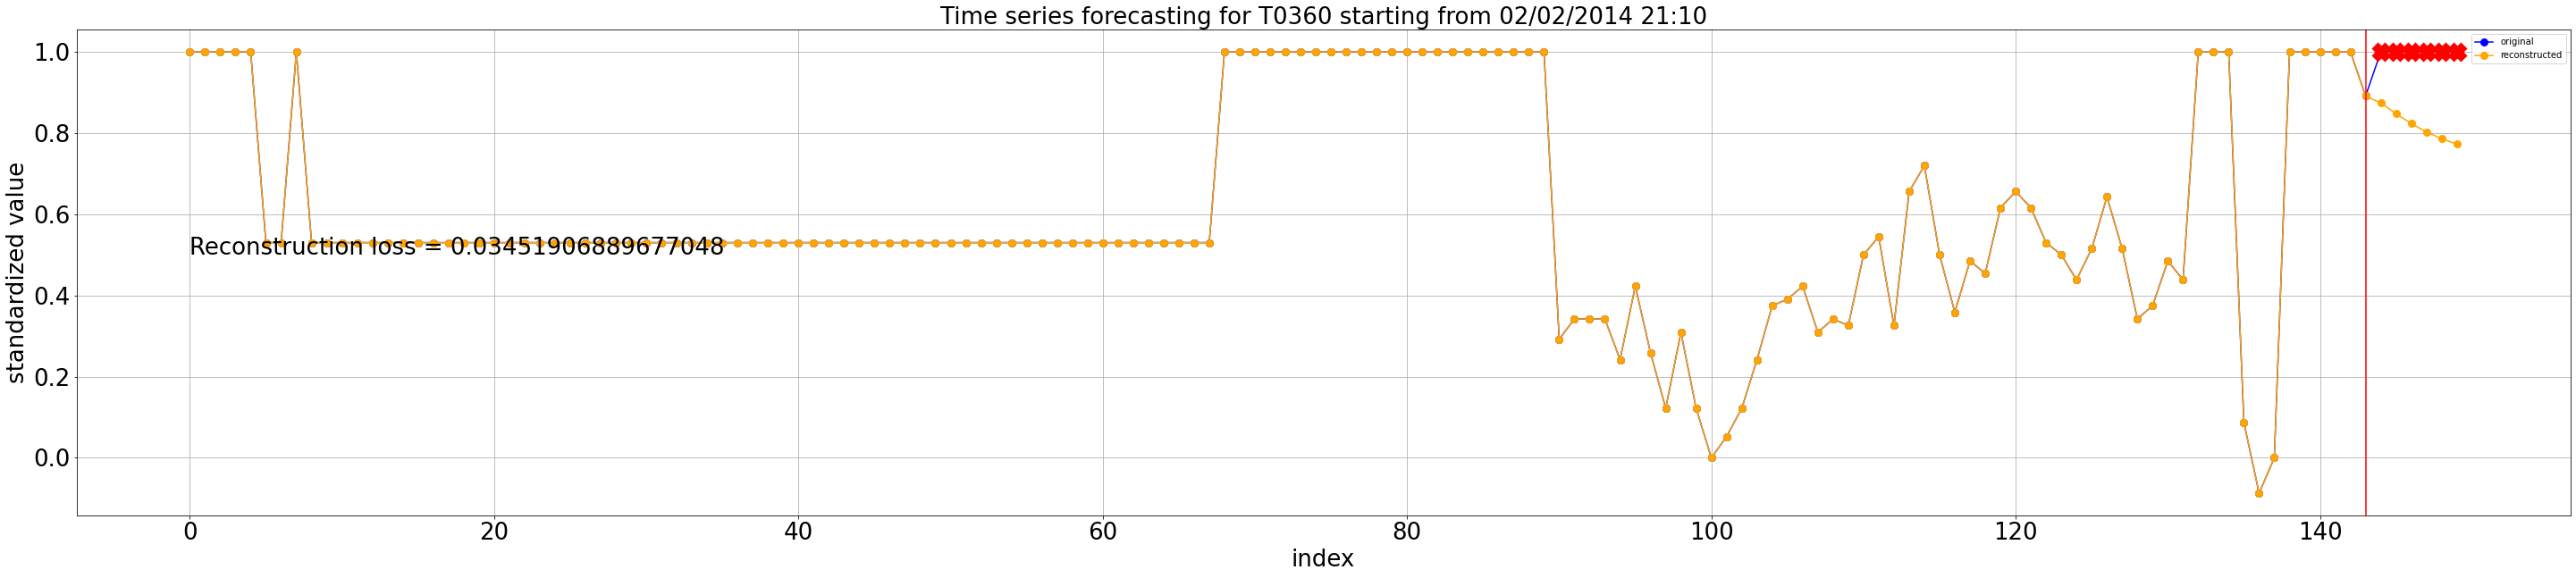

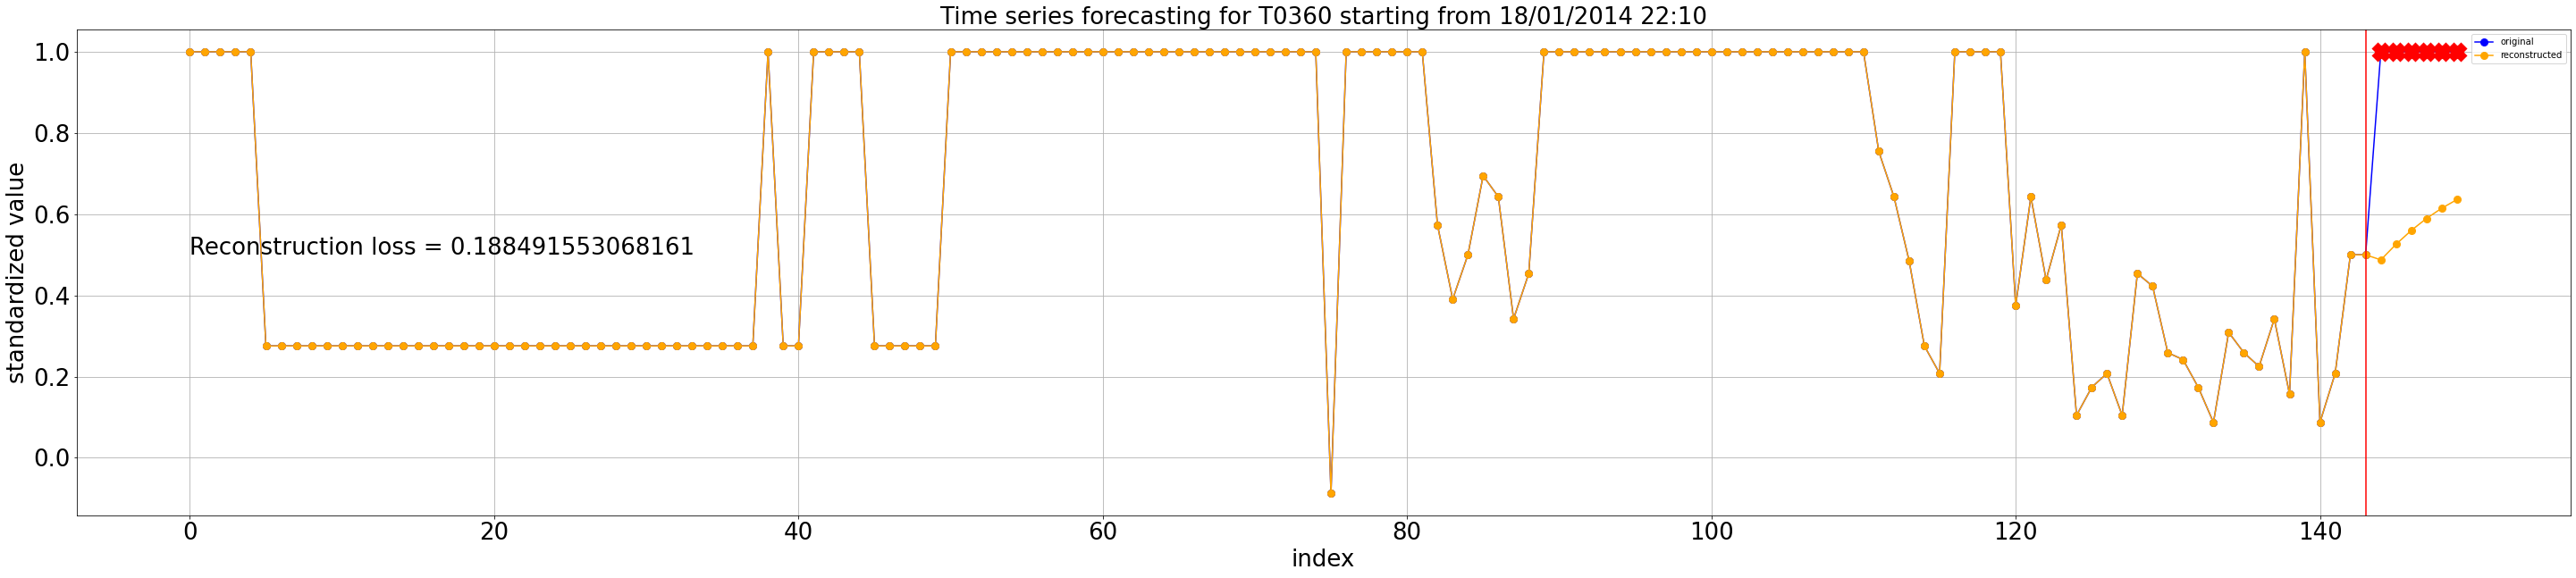

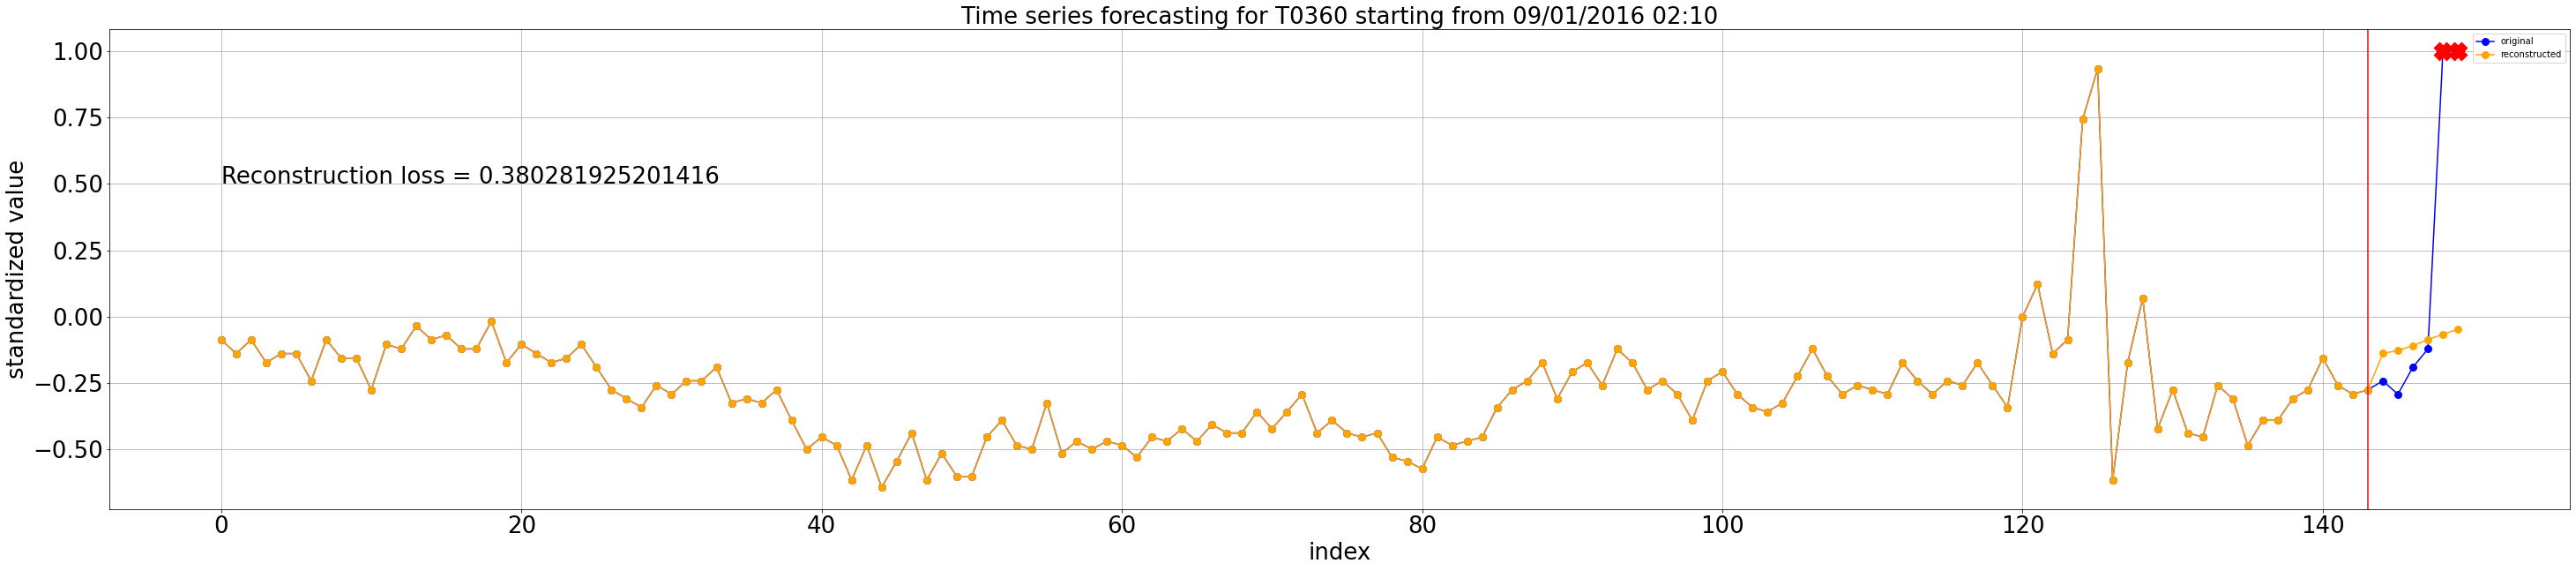

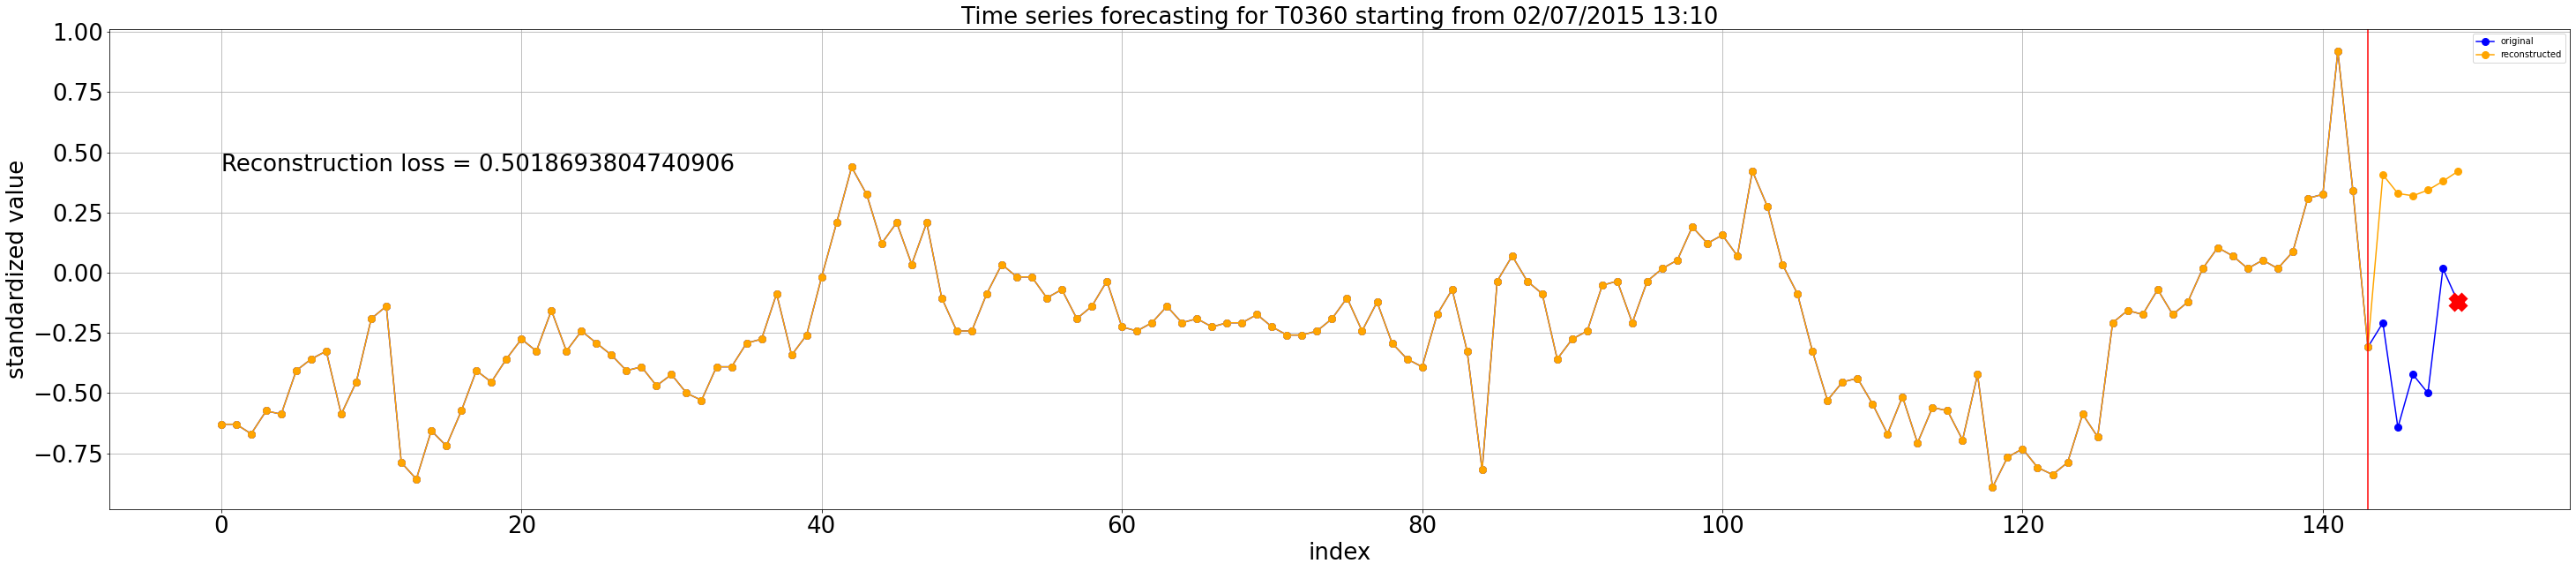

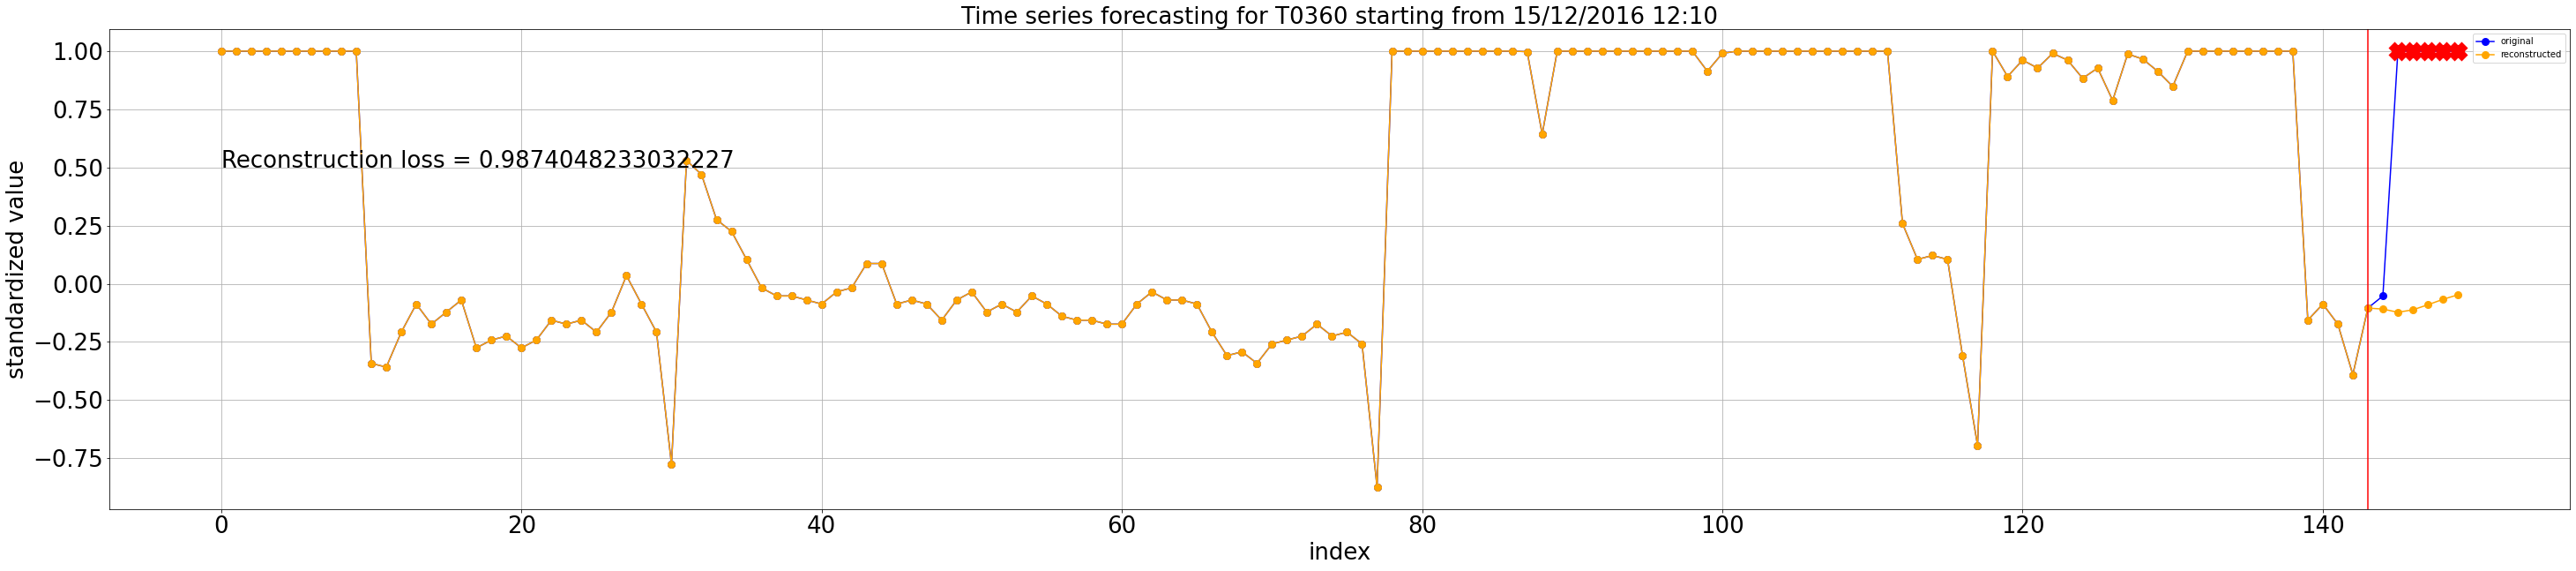

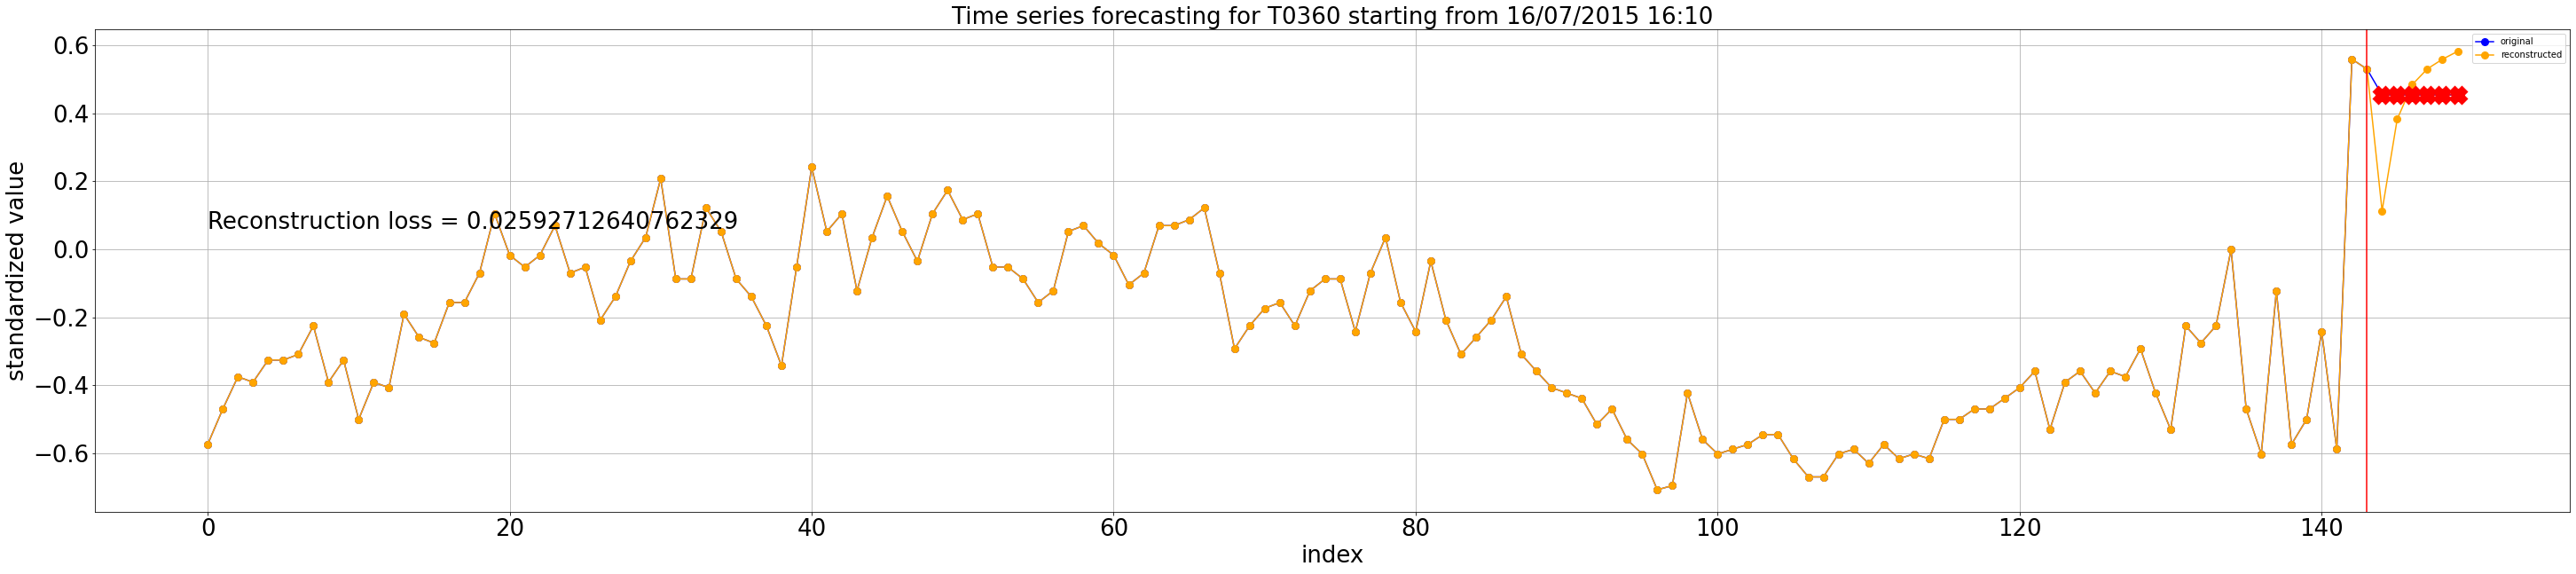

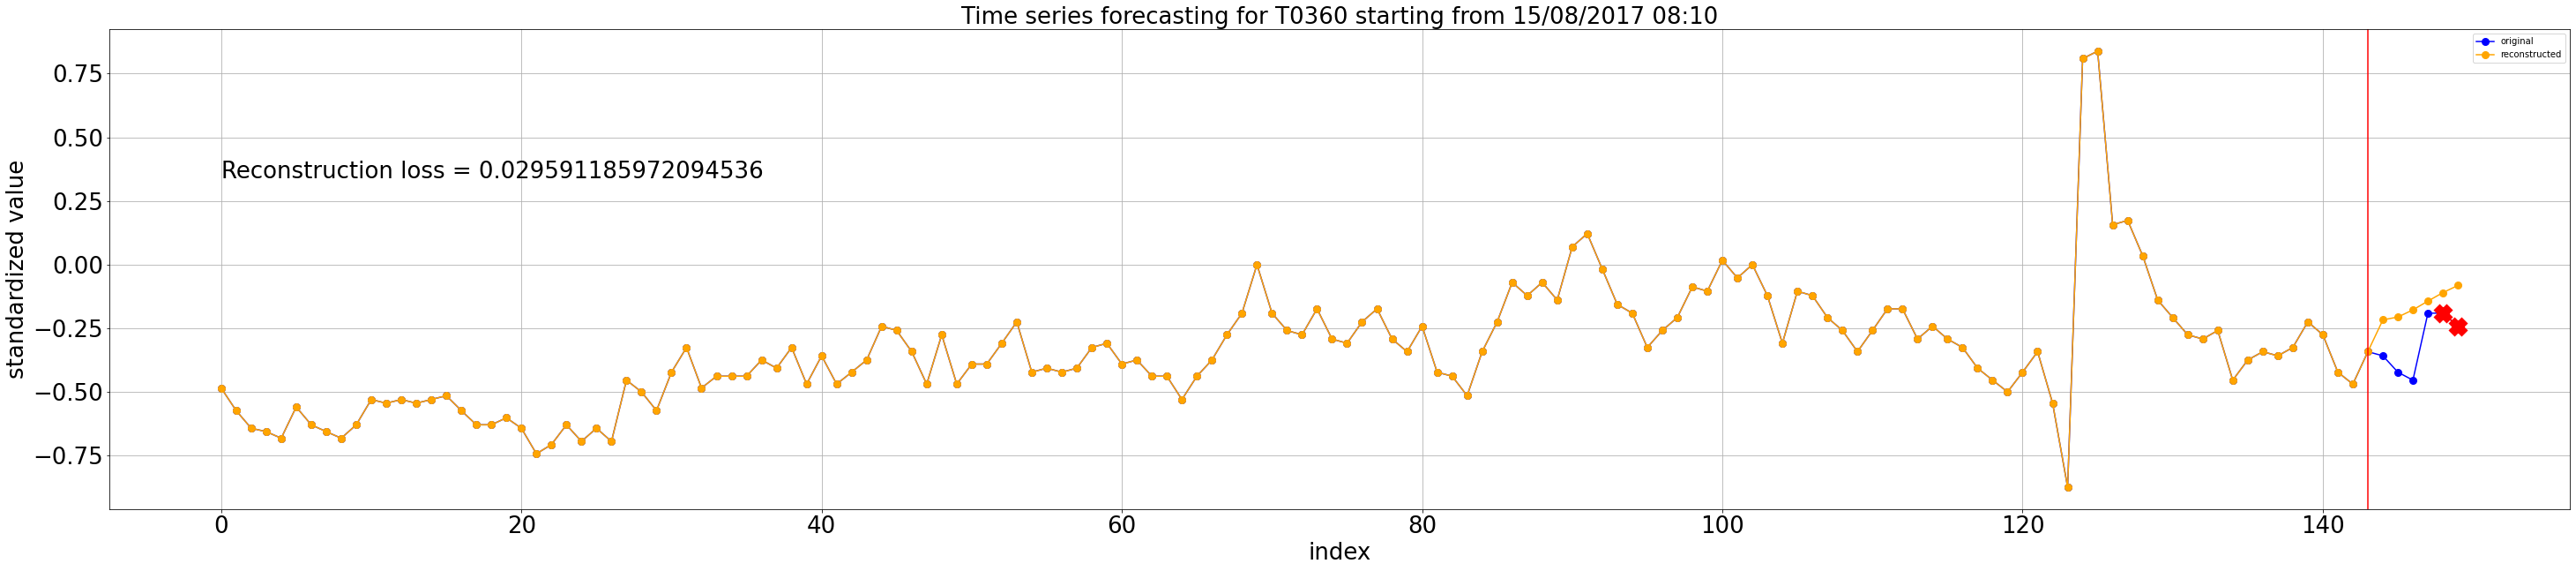

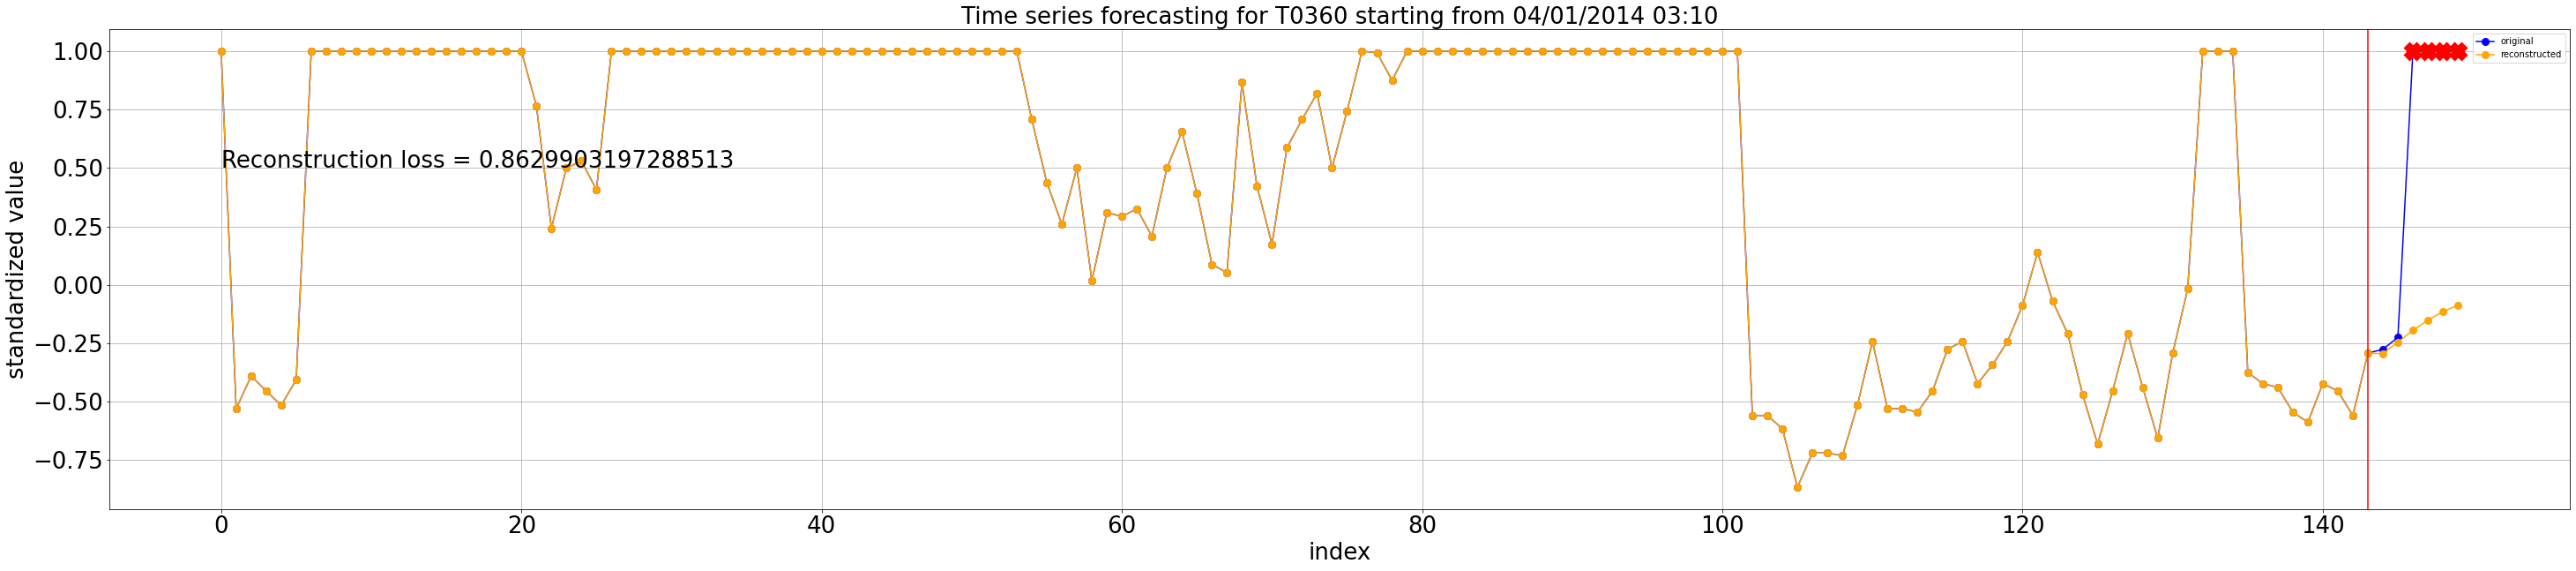

In [266]:
for i in indexes_anomalies:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('standardized value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, sample_tensor_target[i].to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features, sample_tensor_target), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = "original")
  plt.text(0,max(original_signal)-0.5,f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot(reconstructed[i].to("cpu"),"o-",ms=8,color="orange", label = "reconstructed")
  plt.plot(np.arange(144,150), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=143, color='red')
  plt.grid()
  plt.legend()